In [143]:
#Import dependencies
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

#For frequency distributions
from scipy import stats
from sklearn.preprocessing import StandardScaler



In [144]:
#Set directory
%cd "C:\Users\Jordan\Desktop\JMyerowitzLendingTreeAssignment"

C:\Users\Jordan\Desktop\JMyerowitzLendingTreeAssignment


In [145]:
#Import the csv files we're looking at
lendingtree = pd.read_csv("PMLendingClub.csv", sep= ",")
lendingtree

#Investigating the shape
print(lendingtree.shape)  #It is 1722891 rows and 44 columns

#What are the columns?
print(list(lendingtree))

#Assign columns to an object so that we can reference them for a missing values report
cols = list(lendingtree)

(1722891, 44)
['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'application_type', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'year']


In [146]:
#Are there any null values in the report?
lendingtree.isnull().values.any() #True, we have null values

lendingtree.isnull() #Absolutely. Prints off Boolean in each cell

lendingtree.isnull().values #prints off array with Boolean in each value

print(sum(lendingtree.isnull().values)) #Prints off array with a missing values report like JMP

#Assign report to object
missing = sum(lendingtree.isnull().values)


[      0 1722891       0       0       0       0       0       0  109684
  103808       0       0       0       0       1       0     579       1
  854924 1430370       0       0       0    1120       0       0       0
       0       0       0       0       0   27741   27741    7495   27771
   25812   26733   27894   26248   27741    7495    7495       0]


In [147]:
### missing by row ####

missing_rows= lendingtree.isnull().sum(axis = 1)
missing_rows

0          2
1          2
2          2
3          3
4          3
5          3
6          3
7          3
8          2
9          3
10         3
11         3
12         2
13         3
14         2
15         3
16         2
17         1
18         1
19         1
20         3
21         3
22         2
23         2
24         2
25         3
26         3
27         2
28         3
29         3
          ..
1722861    1
1722862    1
1722863    1
1722864    2
1722865    2
1722866    2
1722867    2
1722868    3
1722869    4
1722870    2
1722871    2
1722872    4
1722873    4
1722874    4
1722875    3
1722876    3
1722877    2
1722878    2
1722879    2
1722880    4
1722881    2
1722882    2
1722883    4
1722884    4
1722885    3
1722886    3
1722887    2
1722888    3
1722889    3
1722890    4
Length: 1722891, dtype: int64

In [148]:
#Creating the dataframe of missing information
df = pd.DataFrame()
df["cols"] = cols
df["missing"] = missing
df["percentage"] = (missing / 1722891) * 100
df

cols  missing  percentage
0               Unnamed: 0        0    0.000000
1                       id  1722891  100.000000
2                loan_amnt        0    0.000000
3              funded_amnt        0    0.000000
4                     term        0    0.000000
5                 int_rate        0    0.000000
6              installment        0    0.000000
7                    grade        0    0.000000
8                emp_title   109684    6.366276
9               emp_length   103808    6.025222
10          home_ownership        0    0.000000
11              annual_inc        0    0.000000
12                 issue_d        0    0.000000
13             loan_status        0    0.000000
14                zip_code        1    0.000058
15              addr_state        0    0.000000
16                     dti      579    0.033606
17          inq_last_6mths        1    0.000058
18  mths_since_last_delinq   854924   49.621479
19  mths_since_last_record  1430370   83.021503
20                open_acc        0    0.000000
21                 pub_rec        0    0.000000
22               revol_bal        0    0.000000
23              revol_util     1120    0.065007
24               total_acc        0    0.000000
25     initial_list_status        0    0.000000
26             total_pymnt        0    0.000000
27         total_pymnt_inv        0    0.000000
28           total_rec_int        0    0.000000
29      total_rec_late_fee        0    0.000000
30         last_pymnt_amnt        0    0.000000
31        application_type        0    0.000000
32             tot_cur_bal    27741    1.610142
33        total_rev_hi_lim    27741    1.610142
34    acc_open_past_24mths     7495    0.435025
35             avg_cur_bal    27771    1.611884
36          bc_open_to_buy    25812    1.498180
37                 bc_util    26733    1.551636
38          pct_tl_nvr_dlq    27894    1.619023
39        percent_bc_gt_75    26248    1.523486
40         tot_hi_cred_lim    27741    1.610142
41       total_bal_ex_mort     7495    0.435025
42          total_bc_limit     7495    0.435025
43                    year        0    0.000000

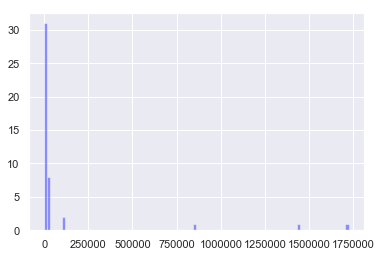

DescribeResult(nobs=44, minmax=(0, 1722891), mean=101444.18181818182, variance=123751415580.5243, skewness=3.7841143473872068, kurtosis=13.093114460121448)

In [149]:
#Plot missing values to see what the distribution is

fig = sns.distplot(missing, kde = False, bins = 100, color = "blue") #kde = kernal desnisty estimation

plt.show(fig)

stats.describe(missing)

In [150]:
#We definitely don't want those columns with all those missing values. 
#Creating a list of columns of that don't have more than than 430000 values. (25% of a column's values is 430000)

keep = list(df[df["missing"] < 430000] ["cols"])
print(len(keep))
print(keep)

41
['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'application_type', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'year']


In [151]:
#Now, import the dataset with the selected values

nlendingtree = pd.read_csv("PMLendingClub.csv", sep = ',', usecols = keep)

description = nlendingtree.describe(include = "all").T
description

count  unique         top     freq      mean  \
Unnamed: 0            1.72289e+06     NaN         NaN      NaN    861445   
loan_amnt             1.72289e+06     NaN         NaN      NaN   14863.5   
funded_amnt           1.72289e+06     NaN         NaN      NaN   14863.2   
term                      1722891       2   36 months  1233549       NaN   
int_rate                  1722891     321      11.99%    49202       NaN   
installment           1.72289e+06     NaN         NaN      NaN   442.866   
grade                     1722891       7           C   514463       NaN   
emp_title                 1613207  426790     Teacher    30145       NaN   
emp_length                1619083      11   10+ years   578254       NaN   
home_ownership            1722891       6    MORTGAGE   853271       NaN   
annual_inc            1.72289e+06     NaN         NaN      NaN     77607   
issue_d                   1722891      72    Mar-2016    61992       NaN   
loan_status               1722891       7  Fully Paid  1061583       NaN   
zip_code                  1722890     951       945xx    18299       NaN   
addr_state                1722891      51          CA   239837       NaN   
dti                   1.72231e+06     NaN         NaN      NaN   18.7165   
inq_last_6mths        1.72289e+06     NaN         NaN      NaN   0.60309   
open_acc              1.72289e+06     NaN         NaN      NaN   11.7031   
pub_rec               1.72289e+06     NaN         NaN      NaN  0.219079   
revol_bal             1.72289e+06     NaN         NaN      NaN   16828.2   
revol_util                1721771    1316          0%     7057       NaN   
total_acc             1.72289e+06     NaN         NaN      NaN    24.655   
initial_list_status       1722891       2           w  1108284       NaN   
total_pymnt           1.72289e+06     NaN         NaN      NaN   14609.5   
total_pymnt_inv       1.72289e+06     NaN         NaN      NaN   14603.3   
total_rec_int         1.72289e+06     NaN         NaN      NaN   2858.89   
total_rec_late_fee    1.72289e+06     NaN         NaN      NaN   1.94878   
last_pymnt_amnt       1.72289e+06     NaN         NaN      NaN   4085.13   
application_type          1722891       2  Individual  1671166       NaN   
tot_cur_bal           1.69515e+06     NaN         NaN      NaN    142063   
total_rev_hi_lim      1.69515e+06     NaN         NaN      NaN   33472.1   
acc_open_past_24mths   1.7154e+06     NaN         NaN      NaN   4.54909   
avg_cur_bal           1.69512e+06     NaN         NaN      NaN   13500.6   
bc_open_to_buy        1.69708e+06     NaN         NaN      NaN   10339.5   
bc_util               1.69616e+06     NaN         NaN      NaN   60.2131   
pct_tl_nvr_dlq          1.695e+06     NaN         NaN      NaN   93.9783   
percent_bc_gt_75      1.69664e+06     NaN         NaN      NaN   45.1836   
tot_hi_cred_lim       1.69515e+06     NaN         NaN      NaN    176286   
total_bal_ex_mort      1.7154e+06     NaN         NaN      NaN   50763.4   
total_bc_limit         1.7154e+06     NaN         NaN      NaN   22187.4   
year                  1.72289e+06     NaN         NaN      NaN   2015.38   

                           std      min      25%      50%          75%  \
Unnamed: 0              497356        0   430722   861445  1.29217e+06   
loan_amnt              8901.05     1000     8000    12800        20000   
funded_amnt            8900.85     1000     8000    12800        20000   
term                       NaN      NaN      NaN      NaN          NaN   
int_rate                   NaN      NaN      NaN      NaN          NaN   
installment            261.563     4.93    253.9   378.86       585.22   
grade                      NaN      NaN      NaN      NaN          NaN   
emp_title                  NaN      NaN      NaN      NaN          NaN   
emp_length                 NaN      NaN      NaN      NaN          NaN   
home_ownership             NaN      NaN      NaN      NaN          NaN   
annual_inc           

In [152]:
description = nlendingtree.describe(include = "all").T
description

count  unique         top     freq      mean  \
Unnamed: 0            1.72289e+06     NaN         NaN      NaN    861445   
loan_amnt             1.72289e+06     NaN         NaN      NaN   14863.5   
funded_amnt           1.72289e+06     NaN         NaN      NaN   14863.2   
term                      1722891       2   36 months  1233549       NaN   
int_rate                  1722891     321      11.99%    49202       NaN   
installment           1.72289e+06     NaN         NaN      NaN   442.866   
grade                     1722891       7           C   514463       NaN   
emp_title                 1613207  426790     Teacher    30145       NaN   
emp_length                1619083      11   10+ years   578254       NaN   
home_ownership            1722891       6    MORTGAGE   853271       NaN   
annual_inc            1.72289e+06     NaN         NaN      NaN     77607   
issue_d                   1722891      72    Mar-2016    61992       NaN   
loan_status               1722891       7  Fully Paid  1061583       NaN   
zip_code                  1722890     951       945xx    18299       NaN   
addr_state                1722891      51          CA   239837       NaN   
dti                   1.72231e+06     NaN         NaN      NaN   18.7165   
inq_last_6mths        1.72289e+06     NaN         NaN      NaN   0.60309   
open_acc              1.72289e+06     NaN         NaN      NaN   11.7031   
pub_rec               1.72289e+06     NaN         NaN      NaN  0.219079   
revol_bal             1.72289e+06     NaN         NaN      NaN   16828.2   
revol_util                1721771    1316          0%     7057       NaN   
total_acc             1.72289e+06     NaN         NaN      NaN    24.655   
initial_list_status       1722891       2           w  1108284       NaN   
total_pymnt           1.72289e+06     NaN         NaN      NaN   14609.5   
total_pymnt_inv       1.72289e+06     NaN         NaN      NaN   14603.3   
total_rec_int         1.72289e+06     NaN         NaN      NaN   2858.89   
total_rec_late_fee    1.72289e+06     NaN         NaN      NaN   1.94878   
last_pymnt_amnt       1.72289e+06     NaN         NaN      NaN   4085.13   
application_type          1722891       2  Individual  1671166       NaN   
tot_cur_bal           1.69515e+06     NaN         NaN      NaN    142063   
total_rev_hi_lim      1.69515e+06     NaN         NaN      NaN   33472.1   
acc_open_past_24mths   1.7154e+06     NaN         NaN      NaN   4.54909   
avg_cur_bal           1.69512e+06     NaN         NaN      NaN   13500.6   
bc_open_to_buy        1.69708e+06     NaN         NaN      NaN   10339.5   
bc_util               1.69616e+06     NaN         NaN      NaN   60.2131   
pct_tl_nvr_dlq          1.695e+06     NaN         NaN      NaN   93.9783   
percent_bc_gt_75      1.69664e+06     NaN         NaN      NaN   45.1836   
tot_hi_cred_lim       1.69515e+06     NaN         NaN      NaN    176286   
total_bal_ex_mort      1.7154e+06     NaN         NaN      NaN   50763.4   
total_bc_limit         1.7154e+06     NaN         NaN      NaN   22187.4   
year                  1.72289e+06     NaN         NaN      NaN   2015.38   

                           std      min      25%      50%          75%  \
Unnamed: 0              497356        0   430722   861445  1.29217e+06   
loan_amnt              8901.05     1000     8000    12800        20000   
funded_amnt            8900.85     1000     8000    12800        20000   
term                       NaN      NaN      NaN      NaN          NaN   
int_rate                   NaN      NaN      NaN      NaN          NaN   
installment            261.563     4.93    253.9   378.86       585.22   
grade                      NaN      NaN      NaN      NaN          NaN   
emp_title                  NaN      NaN      NaN      NaN          NaN   
emp_length                 NaN      NaN      NaN      NaN          NaN   
home_ownership             NaN      NaN      NaN      NaN          NaN   
annual_inc           

In [214]:
listofcols = description[description.iloc[:,[2]].isna().any(axis=1)].index

for i, j in enumerate (listofcols):
    print(i, j)
    
tokeep = listofcols[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]

0 Unnamed: 0
1 loan_amnt
2 funded_amnt
3 installment
4 annual_inc
5 dti
6 inq_last_6mths
7 open_acc
8 pub_rec
9 revol_bal
10 total_acc
11 total_pymnt
12 total_pymnt_inv
13 total_rec_int
14 total_rec_late_fee
15 last_pymnt_amnt
16 tot_cur_bal
17 total_rev_hi_lim
18 acc_open_past_24mths
19 avg_cur_bal
20 bc_open_to_buy
21 bc_util
22 pct_tl_nvr_dlq
23 percent_bc_gt_75
24 tot_hi_cred_lim
25 total_bal_ex_mort
26 total_bc_limit
27 year


In [261]:
nlendingtree = lendingtree[tokeep]

print(nlendingtree.shape)

nlendingtreenoyear = nlendingtree.drop(['year'], axis = 1)

nlendingtreeNoNA = nlendingtreenoyear.dropna()

nlendingtreeNoNA.head

nlendingtreeNoNA.shape

(1722891, 27)


(1675043, 26)

In [155]:
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.02

ell = EllipticEnvelope(contamination = outlier_frac)
ell.fit(nlendingtreeNoNA)

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.522930310846618 > 214.131052295385217). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.275518007161793 > 220.585578044922613). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.440730845544635 > 220.169688154785320). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.045412002980697 > 217.600921068934298). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.697144243906735 > 212.576363000015817). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.382761696084884 > 217.696056713825470). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.251785862321498 > 215.600993590749056). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.388106700641856 > 212.793467096484164). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.524118484706634 > 214.920462048802989). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.394095903120785 > 219.665804951059926). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.546495878161494 > 216.554975096328320). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.585350533801204 > 220.055129562686886). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.125643175632717 > 217.000557272036673). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.905230654031470 > 219.062907467559853). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.410864849353317 > 217.847827390329940). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.385536360295220 > 211.060676529754886). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.335090173354644 > 219.132609740060076). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.034421169589848 > 214.813990662123615). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.663857862245749 > 219.290808156278246). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.018373102010628 > 214.804559793989114). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.024464772012635 > 214.292156166728176). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.974053774087309 > 219.190461700136836). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.580113682285003 > 218.075011299870710). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.746733289115411 > 220.655207179514946). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.018343408031996 > 217.625938188255333). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (227.130556850799394 > 221.490297232461927). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.450143184194900 > 221.436349896304051). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.925137337332785 > 218.697997485046784). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (211.162920618993098 > 208.268007421977302). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.054357639317487 > 213.421203982411924). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.909094004343615 > 218.768832887139837). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.895090571878256 > 214.124612946142577). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.511653676205185 > 217.528110171751365). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.260104216927971 > 220.351872335722931). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.354235609682462 > 212.579165521739355). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.288074271432293 > 216.232867735308787). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.482603934476970 > 208.664131091473109). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.693909859903528 > 218.499857382478467). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.218355962016034 > 218.347883713229606). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.015036238075453 > 215.124430382659341). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.833392897149196 > 217.162822309983397). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.793955826093594 > 216.044300904060947). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.799040784348620 > 216.014283630023840). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.576010062375332 > 219.800020100655047). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.357782086957400 > 219.309168593721012). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.886550778435890 > 212.541886216205228). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.982247414343760 > 219.904518917204541). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.767495695760573 > 220.242809110162796). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.012197628503714 > 218.120982833327020). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.044865991054138 > 215.972612940623634). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.742150143401034 > 210.657951152933833). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.068987849691013 > 217.036823765755656). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.556137340369787 > 208.618772951633474). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.340819420890057 > 209.944482108699106). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.680936718626299 > 221.249839476617467). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.214427475800591 > 215.938149592017851). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.209417853011530 > 213.766023028982005). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.558616082205504 > 220.926108148635251). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.713354911613465 > 219.676640287571615). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.080627281756676 > 218.917040267000118). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.792183498048274 > 219.897286204929003). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.281701120224881 > 214.046104841280055). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.303420845109315 > 222.145320625714106). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.805038425483332 > 215.720376792055163). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.133401938502885 > 216.892198379410161). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.787048347624392 > 217.352963964421804). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.936503643499321 > 221.658344043573521). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.729754319661396 > 217.929046068133829). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.216435402715149 > 214.420058381475144). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.393934197557314 > 213.155766381082117). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.196592196850958 > 216.485702718495617). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.467910976520756 > 219.311747122857582). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.445320989869487 > 218.478164585917625). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.215221743654155 > 219.343261809623925). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.430781807629273 > 218.585902171514988). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.570416591982621 > 215.269421155767901). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.257485662357794 > 218.524707035907170). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.247729428683982 > 216.329334356012765). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.740041443482738 > 216.707817409789442). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.345055733642624 > 215.560313941407372). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.438917863827811 > 214.206513543607485). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.464106535032698 > 219.148737799305252). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.203897428523248 > 216.391991971217237). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.077031778729264 > 215.991070915449001). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.030900863083531 > 216.613960486757776). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.882786617427172 > 215.552511079294248). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.815922532468591 > 222.160029852911180). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.426928142916722 > 220.684375245980107). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.641001361479056 > 220.464936406688622). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.099326194345991 > 218.631776754380979). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.717540405322524 > 216.855140076480154). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.424049134987996 > 218.313613497382306). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.764428590755841 > 219.457398844927042). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.656696689366356 > 203.806679146555041). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.844769994753875 > 208.586824168403581). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.929076737445712 > 215.737676302958818). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.028695528627594 > 219.911160846356381). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.791186135292207 > 218.464369795314155). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.383348730531310 > 210.826913953728820). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (265.163313767663396 > 238.716421991803742). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.754402111782554 > 217.066710852582190). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.475566955627215 > 210.914787475975459). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.069691173564962 > 217.966206957367604). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.435134739378753 > 218.689968110122322). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.394275738806726 > 219.569252731706740). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.152483135042729 > 211.591137285652394). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.849633446455044 > 209.206777975617655). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.682624058302139 > 217.529335938227746). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.692554805716441 > 212.131622821741900). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.500552024197418 > 220.972256042894799). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (237.932460683673469 > 209.826579399238739). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.567229628764863 > 213.782975527226995). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.795311689490717 > 218.803197080795769). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.092748560968545 > 210.038774382545995). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.574901402922563 > 217.299482906829780). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.698819229657630 > 220.654401011481099). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.599510146799815 > 217.213384944535846). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.858315561403117 > 213.741791596343802). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.392224059793023 > 213.295402894492469). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.603025043755849 > 213.227556480817668). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.627657457403103 > 218.357454205900126). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.895407634119124 > 208.046141178858335). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.426529917062538 > 215.823677091190461). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.156320893132715 > 218.628875950020415). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.559097221703780 > 215.984690225647341). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.339831853539664 > 220.263479450716574). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.974473108183020 > 217.363699507167695). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.499042214617759 > 213.261695675022452). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.174941331963993 > 214.796993180404996). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.183755456423654 > 212.717206427917972). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.423531076467100 > 212.581420748605723). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.732338681637543 > 211.571744780234354). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.285577165560397 > 218.184302618161553). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.262900039468946 > 215.811564989564289). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.336881615086810 > 218.163814372379477). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.707939524439837 > 211.613559492786806). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.791747279665685 > 216.225153673448119). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.483420498473578 > 215.299563037028094). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.292861434491584 > 208.926221518332511). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.728823771740139 > 215.590906869223659). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.204939492491775 > 217.216477361210877). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.342460209249367 > 217.283884412578232). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.817366535806514 > 218.312605667162217). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.680734517349521 > 222.407485018499159). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.003527442995733 > 214.524325064178925). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.764545416811615 > 217.745880670416597). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.512541857100388 > 209.811750686944066). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.455362425994196 > 211.103415551373047). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.230264919600074 > 217.339155101068570). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.087250857627339 > 217.869542054860233). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.251376780058990 > 213.191916370682549). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.650916372366225 > 220.022639235265416). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.252306475170030 > 219.029317653387437). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.616650329570149 > 213.533971418097821). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.186477615613455 > 210.826550771069350). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.077915456476489 > 216.329143053833917). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.509126186531716 > 218.048058250826813). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.239367135201775 > 205.099982267458529). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.286446200467736 > 216.763327427175426). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.389056533020550 > 207.816968417702185). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (211.663592228916940 > 211.253768839285499). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.232997045910565 > 213.858502550079379). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.986099200305318 > 213.993440338124628). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.526511952195023 > 209.724789891260343). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.830940635366289 > 215.496893437821910). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.241206729352541 > 219.960355620688119). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.327456151900890 > 212.572653636489292). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.723014354766349 > 218.191265533379948). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.023833616029293 > 214.360269371767458). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.018727032289519 > 214.081745092279192). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.245348403030903 > 215.270153305365312). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.974602478296788 > 219.938900062467951). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.583141155548532 > 219.130830640574032). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.151372291277056 > 213.392472117214169). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.843964117808923 > 217.733837217415982). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.727496060811831 > 211.777298611425124). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.966237285852515 > 219.783451844022522). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.670006295428124 > 218.548528354150676). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.705899341677110 > 214.945470769151683). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.959920668304619 > 217.758138705911790). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.603424987305260 > 216.836295327321352). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.535342573110285 > 217.443614434778084). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.581881907278017 > 204.459661262997912). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.071753024857827 > 214.951088566223802). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.952980058992949 > 218.943330919368947). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.536562099875511 > 211.642630202632887). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.822188336840384 > 215.440722720098790). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.415182673541494 > 217.721482965213596). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.270771603161251 > 215.750320691038610). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.389517900310182 > 217.395489972764551). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.403322970732916 > 212.879211212498006). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.638115329074594 > 220.201869629400278). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.573724772369133 > 218.554807342818606). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.687170132239231 > 214.680997770535384). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.356086028993928 > 219.701520249836193). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.772117191528764 > 218.597402232393108). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.610354744706513 > 217.966360044728276). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.351317320511185 > 214.577257477922132). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.371500682294027 > 215.976524140048781). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.951060536733507 > 217.696938735628066). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.839582227711873 > 220.400950290290382). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.087305371866165 > 216.723215027199075). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.602057284554633 > 205.158090994793213). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.487792085097709 > 217.309610444813842). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.671924080628770 > 203.415525259782868). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.937931561408163 > 218.643357422901772). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.379838373608209 > 215.829098832293482). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.422556109407367 > 218.216520553878468). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.053143297748392 > 218.247382227289194). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.584625143544940 > 218.178841254386981). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.813412121463273 > 214.472039570181067). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.790458861780792 > 217.968759763106135). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.670536544454677 > 204.913292488963975). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.998582797566570 > 211.160716694569913). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.983951961945024 > 216.561367723950440). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.718434775824932 > 218.365722296256422). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.362623228188312 > 204.525239365360335). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.830282711335315 > 219.176156683444930). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.743850040658884 > 219.168766713075684). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.232799444687458 > 211.526444847177402). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.519978562179233 > 218.564018292869093). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.083433537353983 > 213.824925801524842). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.288040722882869 > 217.796070843889680). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.687868859427653 > 215.279871147904686). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.264997089333775 > 211.731520998219736). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.092145093113231 > 213.808364736175832). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.665474673218853 > 213.012799854808378). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.514285766171582 > 216.553306600302136). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.230663379159722 > 219.443383059280222). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.870953818749570 > 219.081436045977227). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.100191659641041 > 218.594147867331827). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.976040310989305 > 211.433651249772595). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.784536326681319 > 213.638753739724820). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.781189757932879 > 213.674502673811560). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.081912914071864 > 219.600195085097255). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.459226594740983 > 215.543658212327102). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.641096460220410 > 218.633226221920097). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.910129711437520 > 205.541721519314763). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.668697193669033 > 217.828627250373700). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.295487343180270 > 212.845722718611512). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.563063176641094 > 216.168028945902819). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.207508437317500 > 218.444777519761431). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.145908333866714 > 212.095214157456553). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.330489083272369 > 215.514094624672083). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.907844421918412 > 220.392229204002945). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.929055053491169 > 214.688276183803993). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.685362403163339 > 218.659569553144280). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.195119855067816 > 212.348853376371693). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.378763646672780 > 216.173930918119879). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.345961295704086 > 219.272502915433023). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.355504761336562 > 211.125528116006421). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.743514419003816 > 215.405681572008547). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.053780397978556 > 219.046926974364652). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.884989639516021 > 217.630821446213218). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.281632028460137 > 220.053502705485613). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.342113398655243 > 218.285580348513236). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.503706714451368 > 216.008469408821185). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.314002391162660 > 219.154765106698818). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.507866571674469 > 214.043139126915634). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.300268166370017 > 217.759622564945630). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.355312613161630 > 217.615982164415072). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.858172845322372 > 218.734608378454595). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.297769502988388 > 212.628207745163365). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.207395113801681 > 217.399688070378915). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.279204206444263 > 217.861151847999821). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.224181539872831 > 213.248982772095133). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.625940672295030 > 218.169230271027345). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.638526476025135 > 219.495730687781929). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.576860524477411 > 216.667975478180352). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.279456319437230 > 217.901146483733442). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.818834186516852 > 218.652560659667614). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.159997195753874 > 213.715289522152489). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.238605820499942 > 207.887103167904741). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.467865600951313 > 214.306868076521937). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.867392934831486 > 219.222637377038154). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.872082535540983 > 219.619362407118018). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.184124797814604 > 218.499674247609363). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.594587636093678 > 217.242085934417560). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.396561484440383 > 217.201574898870774). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.554528114709512 > 215.258099857681088). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.952162710471271 > 217.527123861609255). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.741543886442628 > 214.400242993539024). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.358530973635339 > 210.383063610721166). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.787117373311105 > 212.916913657650412). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.152414875978621 > 219.792557582699203). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.371039068484748 > 213.603088384547419). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.360275841300194 > 219.173497695219709). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.665517631066052 > 217.505406709344044). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.862169822746523 > 217.164137548593743). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.035975525271681 > 218.577250287239934). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.739328695859399 > 216.357031666796985). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.457213926241934 > 215.342380804822739). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.401075596617289 > 213.543308344959883). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.955623447317606 > 217.125972007689711). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.367774136257225 > 218.638636719074896). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.523176452128695 > 221.290729017086676). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.653074213521137 > 216.588410668529917). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.120281801546099 > 209.203546280978060). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.945729687891799 > 217.576287216661257). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.391544353963582 > 212.659343354985253). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.367291626221970 > 216.289964995719089). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.618586678712916 > 219.495309966170339). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.928753636073964 > 214.915711405525457). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.665234345960357 > 213.504760520438197). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.638222376594086 > 218.326420600849758). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.325487042080255 > 217.370196963761799). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.091413751680705 > 217.143429056503948). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.591180492321513 > 217.144976446973828). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.710965519253932 > 218.470910652748614). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.869579846298194 > 212.358360166515070). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.939244314789704 > 214.982881049979227). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.558946284802971 > 209.588294736336763). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.434882723753020 > 212.866463760724741). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.862543420923430 > 219.370579358071865). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.773572316814494 > 217.977849588924329). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.789642871414713 > 217.700145412207348). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.739200739976241 > 215.644388364600502). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.708604564041366 > 219.650934660215967). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.511083997928409 > 218.471295335139132). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.463525625013801 > 219.356944891820405). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.819333867436285 > 211.747916102717198). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.033009500195277 > 216.924347782657861). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.371782571056571 > 218.300061830350501). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.744655348261858 > 217.577676197445498). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.142933633243217 > 218.555722489363689). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.529624378452922 > 213.336844559805854). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.754663116338747 > 207.031646935495701). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.902451408020909 > 217.345756156689390). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.849927477452297 > 217.000851784721931). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.409134809516843 > 212.891571441597250). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.606488128376355 > 219.485686193415802). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.749352553011647 > 217.426955160078165). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.557549046426232 > 213.822461764923275). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.773104385147462 > 218.605631547001451). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.778259185010853 > 214.145550981737955). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.388569962160801 > 216.036416613229790). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.657248002006639 > 206.612888840185775). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.704921039814309 > 211.940317943769031). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.128823292200963 > 215.349835726841462). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.619324714584025 > 219.555718017941444). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.169635217594902 > 219.103010007785656). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.536303628246003 > 215.013013369508286). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.821597329400873 > 217.803771875865152). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.659937522487297 > 214.748441861859135). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.716760407571314 > 215.453637298695469). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.176427903781672 > 217.587834609568972). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.947567354520174 > 219.900395907415458). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.246644691474586 > 216.179339905066058). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.183732413612489 > 218.690855125850675). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.542829925685936 > 217.030220300708066). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.005912865107064 > 214.795892190328004). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.206427435855176 > 212.818471358480849). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.994232382896712 > 220.331817083079358). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.831181717643688 > 218.677584189634160). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.845240097047423 > 217.568972789035286). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.541235673474944 > 212.817514114652852). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.689571146154577 > 211.334765489344647). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.421559431938533 > 213.892186441687670). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.207513426814074 > 217.218503847073663). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.672567790784626 > 218.261724350827564). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.168037710779004 > 210.873254358281201). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.178258698365823 > 220.064347187582882). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.462974199598818 > 219.231443749379736). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.907521049821895 > 219.163247581550451). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.616570407534397 > 219.298238527318659). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.297959486224471 > 214.757790594763890). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.109271141936858 > 211.996773400203296). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.202479939437353 > 216.928255090800633). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.719091672219690 > 216.537929121510956). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.475719151426546 > 212.596982063554606). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.810240283797725 > 217.984516737627246). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.617871008368269 > 218.749072695988900). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.908630456588440 > 217.152138580094714). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.396755353017682 > 212.146487610330013). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.371717723117172 > 211.312420357899043). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.189708197069251 > 218.471061229820549). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.876595465730276 > 217.327418633661267). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.279292633065410 > 218.071247962091093). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.389425449831947 > 218.867932607354476). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.131741699484365 > 216.819427892675606). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.835757086439742 > 211.881421696351140). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.322937845587290 > 216.778491582380155). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.020957392870116 > 218.880194627320435). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.728247176773294 > 218.840407910622133). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.199822597624262 > 215.126877609473780). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.931077904701681 > 211.485918327800448). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.006095464337250 > 218.923183106545110). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.851998917773471 > 218.494468427906412). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.157622189756893 > 217.195120900336519). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.878447729176571 > 212.344728941945164). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.123333587965760 > 218.891891196302055). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.125066534335474 > 218.447746281899526). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.041396044213570 > 216.982775964740767). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.504526249408144 > 214.449046515523122). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.946147708404311 > 210.358139285591250). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.374577345116535 > 217.733998194957366). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.270905518880852 > 215.308207528698290). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.299111941886736 > 212.590115544538776). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.835909352865713 > 212.249976765770811). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.126686761349902 > 218.876772819138353). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.835796608136690 > 217.598238251706874). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.541709930870667 > 218.710672386127044). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.712256112989053 > 209.582617772234158). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.793922175906118 > 216.431606328631432). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.225666134608417 > 211.506534019778570). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.049781417686631 > 216.715815893190580). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.706414982199760 > 214.478613410171022). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.482919156732521 > 219.130180789085614). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.719750394695780 > 218.662801634500426). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.555191364357626 > 218.059188612086558). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.540928269923057 > 216.862153220597776). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.877411873095895 > 212.847498234578694). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.708708379885650 > 214.258328521558582). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.921725090614331 > 219.588420180800227). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.864389664610684 > 215.865051137679018). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.872942713391524 > 214.453144713122953). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.031541111544584 > 218.829293309713904). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.079555077670733 > 217.276164224897485). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.686354569578782 > 217.427203908952521). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.089907059077092 > 217.708468799071682). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.101937839443877 > 209.691405867875545). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.758234046135414 > 217.067476871306411). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.899368455284133 > 218.205443839595802). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.568804049461988 > 219.238118068821024). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.788617517846831 > 217.004466507413980). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.516744913515623 > 217.485824033817380). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.003527103807471 > 213.876598693345841). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.616294275721174 > 217.972947310501127). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.955625834430947 > 213.084359543304032). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.529733726115609 > 215.216915772849575). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.150706903675172 > 218.816422919845053). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.176284251242265 > 218.233392398679058). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.994424104768427 > 217.028196691448187). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.955123535849822 > 218.981507233928227). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.666353698865919 > 218.003855693888880). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.548280198439642 > 218.845259605960706). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.432270478395679 > 216.792724274220461). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.075072404802427 > 218.366109892194032). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.829729921065365 > 214.840008587179341). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.161760302995191 > 219.878005482981166). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.116197759567314 > 216.575360269766861). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.984942937201794 > 217.596579158626241). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.580964902613118 > 212.440645727507615). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.411953226230708 > 217.971318213029974). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.257502033078708 > 217.330566598674807). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.316948178423672 > 218.706798477019618). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.150574276158494 > 215.116460219788792). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.129036969631926 > 216.468556509737482). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.345047413560962 > 215.649498260630679). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.675381152505054 > 215.887499563171758). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.025372512169696 > 217.649082922037223). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.930150223641135 > 218.914478429345877). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.147388829917929 > 217.173617109485292). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.607337336085465 > 212.558440643391350). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.919611695644733 > 219.087693701367442). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.370658826967770 > 216.868023960250781). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.015102315370484 > 216.934810658253156). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.219810357034731 > 215.901612409961189). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.663200990160419 > 216.217620520287994). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.804646144260971 > 212.607303465228000). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.706168763957351 > 216.520262253312751). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.205544856167450 > 217.202408860260675). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.122780950669579 > 216.433471066816139). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.761954336990641 > 217.155863604492367). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.724371332444292 > 216.530073961553768). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.096291674072887 > 218.813190221319019). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.342765278109908 > 218.288604363247828). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.090724317094839 > 217.478179591272095). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.649278173783216 > 217.047404387988479). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.668893237492256 > 216.700286819034943). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.946995553467048 > 212.204896361054722). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.927743039558834 > 218.303706676935064). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.594297735033962 > 212.928396702565095). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.541903938954817 > 216.367159157480643). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.174381227358197 > 214.481233329586871). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.562792194927852 > 212.020455943423912). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.587996945751087 > 211.952801129014716). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.065138454433594 > 218.795820824073246). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.560772908800772 > 214.849462112476374). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.182444423301547 > 216.654226534423231). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.061532691123006 > 213.624211461552648). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.374565361959185 > 206.993354900042561). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.487592419996218 > 217.988580441379497). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.495663873171054 > 215.346430344530177). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.320149608735619 > 218.678781384600825). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.651259886377062 > 211.352973532304105). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.233544470041778 > 212.890718851632812). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.397247865786625 > 219.146652688294807). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.573234373810152 > 219.360103435944637). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.048724186563248 > 219.418592561052662). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.459350540871696 > 219.743892183980563). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.766675900750528 > 218.792176971360988). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.084522150167459 > 216.013212605186141). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.598188656334059 > 216.968777583462952). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.295543460139328 > 218.069414355848664). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.802298523997905 > 213.358157050236287). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.243873698851928 > 214.150042954157243). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.275126284133194 > 219.827098729538534). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.649673786558964 > 217.568962992317211). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.676443314867214 > 207.324663654328162). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.635670216380589 > 208.425307401470548). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.876119363654027 > 218.292234511999908). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.807574340639945 > 214.943422735460786). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.997283033877380 > 216.208487904168749). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.141379970294821 > 212.251962596284955). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.644443094533216 > 216.618266684429244). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.047522778108686 > 215.853272397373644). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.591329338799369 > 215.769872030385670). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.276609922847939 > 217.369554017401413). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.343319569334284 > 211.933525187511037). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.736335463495465 > 215.580687538998092). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.177891751732830 > 212.720383690974387). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.969933952245555 > 211.975551175526903). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.426712974958804 > 216.528660789783800). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.516547264864300 > 215.499394009471246). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.937855201556346 > 217.469240553644994). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.906701750682601 > 213.103769846363662). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.638730896815304 > 219.225203766611116). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.945188006578434 > 217.450595224634043). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.945900692538260 > 218.065930681441216). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.170016498243797 > 218.129494120305168). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.377913884294628 > 215.799780167674584). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.195107387154451 > 216.355516654103724). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.923032776729372 > 212.180108554951943). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.712534969052513 > 218.607757050804025). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.972405864108310 > 213.678172394556157). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.621079800984376 > 212.021105233758902). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.215171852091544 > 216.479021586785450). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.423624702712402 > 218.578239517583086). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.544187114457117 > 207.789544529694325). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.483009808915085 > 219.870485798920754). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.834272157181033 > 213.873885780300526). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.303356039198405 > 218.648084001096407). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.955957692799785 > 216.719257905707849). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.722163316560938 > 215.869741476094845). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.801371776344496 > 219.502676757228301). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.425449184919017 > 215.724999224173871). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.035719847592446 > 212.277517546165740). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.140117530049253 > 218.698779050194133). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.355953529668966 > 217.998586957107307). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.255962381024062 > 211.768327884310679). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.780642396013889 > 216.892677956912166). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.142486703362010 > 217.657044421310900). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.812000889651216 > 213.622006264245499). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.623231038519634 > 215.848967078365945). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.775030787431405 > 210.995980521471864). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.664781444597168 > 213.080812622623341). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.053103054795429 > 219.050142217686073). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.594053749942674 > 216.543648553572439). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.094443612470883 > 214.828712542094195). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.941114488278799 > 219.675050624146735). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.600441943699025 > 218.310551583083196). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.213525905658116 > 213.428493126621021). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.928959859972394 > 219.178225743434297). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.728428831598819 > 214.271253533421515). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.272351857997137 > 215.181509835331525). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.641417195816018 > 217.602732012874327). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.209115486565310 > 213.101064329697692). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.235202519743382 > 213.305017305552411). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.249654335012707 > 215.178237140393406). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.409119514802171 > 217.550040223092111). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.631884496331679 > 217.858271550392146). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.375427683296863 > 212.167963919117426). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.051637897732149 > 215.615371064861620). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.750218275823187 > 213.655710381865021). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.949575757302199 > 210.491048284374102). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.689656221300112 > 213.730549102530205). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.557600608731377 > 213.358847305233354). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.386874172796780 > 210.901004766676522). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.748844812337296 > 218.347465281846922). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.732496330316678 > 217.287705160729757). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.390386617628792 > 212.048944367632600). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.873531464615041 > 208.613218052490424). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.592639502125564 > 218.313242946780832). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.912899341538576 > 215.565632373571788). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.691362555148061 > 216.757811732680750). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.037289943225915 > 216.281739457650275). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.348540288044632 > 213.568959698032870). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.455376771355702 > 205.514967426479899). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.444125560354479 > 216.065467111757073). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.935574120715557 > 217.889351680186678). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.137307637664406 > 213.049742416565550). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.973156332025098 > 216.848408700111776). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.892712678510776 > 217.209761982957218). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.318692476992510 > 219.182080126762116). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.717983172994792 > 212.014052232732411). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.364834393303795 > 216.941904730544792). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.154868958571967 > 214.447609070919157). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.760646205507499 > 211.330709146807379). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.857282067198696 > 216.500016873029665). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.683329948485721 > 218.557559153280664). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.480320834798675 > 213.208636665866948). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.221092458589197 > 218.374530770330722). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.518854275599665 > 216.662381669934064). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.837412805706208 > 217.657513123701023). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.734910030527686 > 216.067310534086573). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.223538008083182 > 213.911309001074443). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.514181977672422 > 213.564599140613183). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.804105369270189 > 217.797046258490667). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.287479148962575 > 217.151188887247969). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.744953526964480 > 217.725496897129091). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.042160248991109 > 219.767137048270314). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.896632231307393 > 214.451035310310488). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.984643041798790 > 212.565941086717316). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.609224740468989 > 214.316440599076969). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.869066541893005 > 218.661778792306876). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.553843937661952 > 206.220987476603426). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.073062425435864 > 209.840482063094981). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.908822363994432 > 217.189143239328644). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.296249634900903 > 214.435335248209469). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.267494877785140 > 214.038183290160134). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.765506461317784 > 219.173629867279885). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.816988800343040 > 215.843704510090703). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.251427687841073 > 219.589501647626747). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.619095014944008 > 217.247653679075881). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.786762816780367 > 217.714276927791389). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.961188375208110 > 218.663014861416315). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (211.687689550796676 > 202.104834561697714). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.556192558839314 > 217.382488442162185). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.738990046287597 > 216.262973474049346). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.041200927885910 > 217.027694639560707). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.622399542072145 > 215.117876023863175). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.426665250450185 > 216.014949306931300). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.032505019423240 > 218.895814595437258). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.558519012000119 > 214.534232803606500). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.354560389781682 > 217.399238274608052). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.070557137672552 > 219.440972256539453). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.722899860174749 > 215.623596623552714). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.850226380833419 > 217.847782201122413). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.527111413762384 > 218.509548502874594). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.577664632718552 > 211.973515731168476). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.598292221989112 > 210.617332964718855). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.770510020399968 > 215.136398369900121). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.918648966361985 > 217.135452189437700). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.547878656300639 > 216.759642477969436). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.656814653541744 > 218.249232366433773). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.755482770395446 > 217.331613104843825). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.618221172745649 > 216.293142349253372). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.427661587451468 > 214.555131732037779). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.467573636075286 > 217.538759332124926). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.972260985897663 > 213.849127622319060). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.691052993628034 > 217.646456489764944). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.507717957203084 > 218.906343127200017). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.152252372607904 > 213.553142850721486). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.532329727416254 > 217.523391883455133). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.852421417054103 > 219.836997496320350). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.391385255735202 > 218.644500281322024). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.963506655008672 > 218.148740512696349). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.004223895294160 > 219.516710112469184). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.012524110561230 > 216.675101865723263). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.852522471047536 > 211.359010849600679). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.410775072753921 > 211.937583692404957). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.651793243990824 > 218.208988244133650). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.421620401581436 > 218.486837498171440). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.418364057146221 > 215.229300577852712). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.815511309816543 > 220.196404018323136). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.188870975033495 > 218.443892089300192). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.443354871586280 > 212.193331493432936). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.091441098388572 > 217.691483352277743). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.141433507055240 > 218.990791195469370). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.722362494938608 > 214.683578309804005). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.361632863362530 > 213.343837469635787). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.319522517151597 > 219.394714870390743). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.234627484219033 > 214.400735187648877). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.632876491656788 > 218.041197824042115). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.717827939288469 > 219.566405751828142). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.885622679577551 > 217.565023326938274). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.105905442029581 > 218.517559379080552). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.800058755637764 > 205.519031456349950). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.948448799047242 > 210.486345783968915). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.935425464344007 > 219.872719240704271). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.641609722978444 > 211.736513575882839). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.075735314185266 > 214.852944871900434). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.966037483094823 > 216.456517907812611). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.767297933405871 > 216.350460638447117). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.106677829133957 > 215.190043519644519). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.975211617535507 > 219.652226820028289). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.347806724804713 > 215.832512734426473). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.276260848403865 > 214.656328735837604). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.167648184514633 > 213.994923624286400). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.660432951358445 > 219.017744302211639). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

EllipticEnvelope(assume_centered=False, contamination=0.02, random_state=None,
         store_precision=True, support_fraction=None)

In [156]:
#Checking for the number of outliers

pred = ell.predict(nlendingtreeNoNA)
print(sum(pred == -1) ) # Outlier points are predicted as -1
stats.itemfreq(pred)



33501


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """


array([[     -1,   33501],
       [      1, 1641542]], dtype=int64)

In [389]:
keep=pred==1

keeptree = nlendingtreeNoNA[keep]

keeptree.head()

loan_amnt  funded_amnt  installment  annual_inc    dti  inq_last_6mths  \
0    10000.0      10000.0       321.13    102000.0  15.55             0.0   
1    20800.0      20800.0       706.16     81500.0  16.73             2.0   
2     8000.0       8000.0       261.88     33000.0  15.75             1.0   
3    28000.0      28000.0       872.52    325000.0  18.55             1.0   
4    11500.0      11500.0       323.54     32760.0  27.06             0.0   

   open_acc  pub_rec  revol_bal  total_acc  ...  total_rev_hi_lim  \
0       9.0      0.0     9912.0       22.0  ...           22300.0   
1      29.0      0.0    23473.0       41.0  ...           43100.0   
2       9.0      1.0     7203.0       16.0  ...           20800.0   
3      15.0      0.0    29581.0       31.0  ...           54200.0   
4      12.0      0.0     9996.0       17.0  ...           14100.0   

   acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  pct_tl_nvr_dlq  \
0                   3.0       4349.0           973.0     89.4            77.3   
1                   9.0        869.0          6811.0     54.6            90.2   
2                   2.0       1772.0          2255.0     72.5           100.0   
3                   6.0      53306.0         13901.0     67.1           100.0   
4                   9.0       2060.0          2689.0     70.1           100.0   

   percent_bc_gt_75  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  
0              66.7          58486.0            39143.0          9200.0  
1              50.0          43100.0            23473.0         15000.0  
2              75.0          33226.0            15949.0          8200.0  
3              16.7         850886.0           199739.0         42200.0  
4              50.0          30891.0            24724.0          9000.0  

[5 rows x 26 columns]

In [158]:
scaler = StandardScaler()

keeptreestd = scaler.fit_transform(keeptree)

print(type(keeptreestd))

print(keeptreestd.shape)

print(keeptreestd.view())

<class 'numpy.ndarray'>
(1641542, 26)
[[-0.54158328 -0.54158328 -0.45945284 ... -0.69894391 -0.22693898
  -0.62187319]
 [ 0.68550186  0.68550189  1.03097587 ... -0.7977208  -0.59508658
  -0.33344389]
 [-0.76882127 -0.76882127 -0.68880614 ... -0.8611111  -0.77185382
  -0.67160238]
 ...
 [-0.54158328 -0.54158328 -0.41698861 ...  0.2315016  -0.29025473
  -0.97992336]
 [ 0.20262113  0.20262116  0.04690505 ... -0.74892941 -0.5413563
  -0.10966253]
 [-0.31434529 -0.31434528 -0.43405946 ... -0.31060933  0.38613133
   0.01466044]]


In [159]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(0.90)
pca.fit(keeptreestd)

pca.n_components_

12

In [160]:
pca_components = pca.transform(keeptreestd)
pca_components.shape

(1641542, 12)

In [161]:
keeptree["index"] = keeptree.index
keeptree2 = keeptree.reset_index()
keeptree2.head()

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


level_0  loan_amnt  funded_amnt  installment  annual_inc    dti  \
0        0    10000.0      10000.0       321.13    102000.0  15.55   
1        1    20800.0      20800.0       706.16     81500.0  16.73   
2        2     8000.0       8000.0       261.88     33000.0  15.75   
3        3    28000.0      28000.0       872.52    325000.0  18.55   
4        4    11500.0      11500.0       323.54     32760.0  27.06   

   inq_last_6mths  open_acc  pub_rec  revol_bal  ...  acc_open_past_24mths  \
0             0.0       9.0      0.0     9912.0  ...                   3.0   
1             2.0      29.0      0.0    23473.0  ...                   9.0   
2             1.0       9.0      1.0     7203.0  ...                   2.0   
3             1.0      15.0      0.0    29581.0  ...                   6.0   
4             0.0      12.0      0.0     9996.0  ...                   9.0   

   avg_cur_bal  bc_open_to_buy  bc_util  pct_tl_nvr_dlq  percent_bc_gt_75  \
0       4349.0           973.0     89.4            77.3              66.7   
1        869.0          6811.0     54.6            90.2              50.0   
2       1772.0          2255.0     72.5           100.0              75.0   
3      53306.0         13901.0     67.1           100.0              16.7   
4       2060.0          2689.0     70.1           100.0              50.0   

   tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  index  
0          58486.0            39143.0          9200.0      0  
1          43100.0            23473.0         15000.0      1  
2          33226.0            15949.0          8200.0      2  
3         850886.0           199739.0         42200.0      3  
4          30891.0            24724.0          9000.0      4  

[5 rows x 28 columns]

In [162]:
cols = []
for i in range (1, 13):
    cols.append("PC" + str(i))

print(cols)

PCdf = pd.DataFrame(pca_components, columns = cols, index  =  keeptree.index)
PCdf


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']


Unnamed: 0  id  loan_amnt  funded_amnt        term int_rate  \
1722871     1722871 NaN    16000.0      16000.0   60 months   18.06%   
1722872     1722872 NaN    32000.0      32000.0   60 months   28.72%   
1722873     1722873 NaN    15000.0      15000.0   36 months   10.91%   
1722874     1722874 NaN    25000.0      25000.0   60 months   30.65%   
1722875     1722875 NaN    10000.0      10000.0   60 months   28.72%   
1722876     1722876 NaN    35000.0      35000.0   60 months   17.09%   
1722877     1722877 NaN    30000.0      30000.0   60 months   17.09%   
1722878     1722878 NaN    18000.0      18000.0   60 months   30.65%   
1722879     1722879 NaN    17950.0      17950.0   60 months   30.17%   
1722880     1722880 NaN    19000.0      19000.0   60 months   14.08%   
1722881     1722881 NaN    15000.0      15000.0   60 months   16.02%   
1722882     1722882 NaN    10000.0      10000.0   36 months   12.62%   
1722883     1722883 NaN     3500.0       3500.0   36 months   10.91%   
1722884     1722884 NaN    21000.0      21000.0   60 months   30.94%   
1722885     1722885 NaN    30000.0      30000.0   60 months   30.75%   
1722886     1722886 NaN    12000.0      12000.0   60 months   14.08%   
1722887     1722887 NaN    12000.0      12000.0   60 months   25.82%   
1722888     1722888 NaN    10000.0      10000.0   36 months   11.99%   
1722889     1722889 NaN    16550.0      16550.0   60 months   21.45%   
1722890     1722890 NaN    12000.0      12000.0   60 months   21.45%   

         installment grade                emp_title emp_length  ...       PC3  \
1722871       406.82     D                Head Chef   < 1 year  ...  0.885911   
1722872      1010.30     F                      NaN        NaN  ... -3.932465   
1722873       490.45     B                      NaN        NaN  ... -0.557005   
1722874       818.85     F                      NaN        NaN  ... -3.697195   
1722875       315.72     F          Content Review      1 year  ... -0.198799   
1722876       871.54     D           Office Manager   < 1 year  ...  3.214611   
1722877       747.03     D          Senior Manager     2 years  ...  0.579097   
1722878       589.57     F  Package Delivery Driver  10+ years  ...  1.289299   
1722879       582.62     F           Head Custodian  10+ years  ... -0.506695   
1722880       442.89     C                      NaN        NaN  ... -0.481338   
1722881       364.94     C  Instructional Designer    < 1 year  ...  1.698811   
1722882       335.12     C            Administrator    5 years  ... -0.210079   
1722883       114.44     B                      NaN        NaN  ...  0.667478   
1722884       691.60     G                      NaN        NaN  ...  1.794817   
1722885       984.47     F                    Sales    6 years  ... -0.698268   
1722886       279.72     C             house keeper  10+ years  ...  0.373217   
1722887       358.01     E            Skilled Labor   < 1 year  ...  1.350295   
1722888       332.10     B                  Teacher  10+ years  ...  2.058503   
1722889       451.94     D               BABYSITTER    3 years  ... -1.393587   
1722890       327.69     D                      NaN        NaN  ... -0.932755   

              PC4       PC5        PC6       PC7       PC8       PC9  \
1722871  3.585641  2.291488  -0.341758 -1.695670 -1.972754  0.860310   
1722872  1.954553  0.677006   2.173999 -1.595832 -1.334476  1.264609   
1722873 -0.117255  0.018416   0.441389 -0.870609 -0.953625  1.026362   
1722874  0.511146  1.576558  -1.873721 -0.888013 -0.936445  0.214621   
1722875 -0.519524 -0.317219  -0.844797 -0.120146  0.195084 -0.349917   
1722876  0.559217 -1.376562  -0.022040 -3.562800  3.370885 -1.146318   
1722877 -1.659469  1.441527   1.775697 -1.529901 -3.470824  2.901798   
1722878  1.831358  1.583451   9.197582 -0.841613  2.521961 -3.569617   
1722879 -0.263174  1.732346  -1.786527 -0.697590  1.671275 -0.260202   
1722880 -0.665454 -0.437703   0.208330 -2.471158  1.077711  0.217603   
17

## Clustering the whole dataset 

In [167]:
# Choose number of clusters (remember k is a hyperparameter and several renditions of the below could be run in a for loop )

# Number of clusters

labels = []
for i in range(5,10):
    kmeans = KMeans(n_clusters= i)
    kmeans = kmeans.fit(PCdf)
    labelPCdf = kmeans.labels_
    labels.append(labelPCdf)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf))
   



C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  del sys.path[0]


[[     0 298439]
 [     1 256424]
 [     2 479194]
 [     3 128539]
 [     4 478946]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  del sys.path[0]


[[     0 222951]
 [     1 119799]
 [     2 153303]
 [     3 316473]
 [     4 427389]
 [     5 401627]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  del sys.path[0]


[[     0 101197]
 [     1 373122]
 [     2 153159]
 [     3 365509]
 [     4 217805]
 [     5 145411]
 [     6 285339]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  del sys.path[0]


[[     0  19485]
 [     1 362014]
 [     2 282788]
 [     3 215328]
 [     4 368642]
 [     5  99854]
 [     6 142834]
 [     7 150597]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  del sys.path[0]


[[     0 198858]
 [     1  70432]
 [     2  19141]
 [     3 345496]
 [     4 271811]
 [     5 104559]
 [     6 151247]
 [     7 333246]
 [     8 146752]]


In [169]:
print(labels)
print(labels[-2])

[array([2, 0, 2, ..., 2, 4, 4]), array([5, 3, 5, ..., 5, 4, 4]), array([1, 4, 1, ..., 1, 3, 3]), array([4, 3, 4, ..., 4, 2, 1]), array([7, 0, 7, ..., 7, 4, 3])]
[4 3 4 ... 4 2 1]


In [181]:
# I want 8 cluster groups!
whole_cluster = labels[-2]
whole_cluster.view()

PCdf["Cluster_number"] = whole_cluster
print(PCdf.head())
PCdf["Cluster_number"].value_counts()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.811849 -1.104080  0.485508  0.020890 -0.342301  0.516556  0.112339   
1  1.904781  0.313641 -1.304975 -2.690256  1.922674 -0.818814  0.762446   
2 -3.020085 -0.702206 -0.162417 -0.383662 -0.456277  0.979704  1.166286   
3  8.206410  1.306099  4.473457  3.255033  1.655034 -1.629547  0.436509   
4 -1.034299 -1.180597 -0.851115 -1.634304  0.221604 -0.459205 -0.893771   

        PC8       PC9      PC10      PC11      PC12  Cluster_number  
0 -1.798789  1.210866  0.162926 -0.122193  0.065611               4  
1 -1.689508 -0.623596  0.788147 -0.108759 -0.820541               3  
2  1.116298 -0.315515  0.715463  0.493994  0.061781               4  
3  0.042298 -0.165493  1.646181 -0.595669  2.872740               6  
4  0.747452 -0.493867 -0.245865 -0.534577 -1.037117               2  


4    368642
1    362014
2    282788
3    215328
7    150597
6    142834
5     99854
0     19485
Name: Cluster_number, dtype: int64

In [182]:
# EllipticEnvelope uses Mahalanobis distance 
from sklearn.covariance import EllipticEnvelope
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor


outlier_frac = 0.01 #Fraction of outiers

ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(PCdf)

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
         store_precision=True, support_fraction=None)

In [184]:
pred1 = ell.predict(PCdf)
print(sum(pred1 == -1) ) # Outlier points are predicted as -1
stats.itemfreq(pred1)
print(PCdf.shape)
pred1

16416
(1641542, 13)


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, ..., 1, 1, 1])

In [196]:
keep1=pred1==1

PCdf1 = PCdf[keep1]

PCdf1.head()
print(PCdf.shape)
PCdf1.shape
PCdf1NoC = PCdf1.drop("Cluster_number", axis = 1)
PCdf1NoC.shape

(1641542, 13)


(1625126, 12)

In [201]:
#Recluster

labels1 = []
for i in range(5,10):
    kmeans = KMeans(n_clusters= i)
    kmeans = kmeans.fit(PCdf1NoC)
    labelPCdf1 = kmeans.labels_
    labels1.append(labelPCdf1)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf1))
   


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 478310]
 [     1 127007]
 [     2 246301]
 [     3 294021]
 [     4 479487]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 217747]
 [     1 425092]
 [     2 119830]
 [     3 149638]
 [     4 399056]
 [     5 313763]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 361339]
 [     1 283868]
 [     2 368853]
 [     3 144325]
 [     4 151083]
 [     5 215601]
 [     6 100057]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 345074]
 [     1 272138]
 [     2 198826]
 [     3 333237]
 [     4 148716]
 [     5 105512]
 [     6 150906]
 [     7  70717]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 108114]
 [     1 142601]
 [     2 261052]
 [     3 309520]
 [     4 303235]
 [     5  68384]
 [     6 143618]
 [     7 188546]
 [     8 100056]]


In [207]:
print(labels1)
print(labels1[-2])

# I want 8 cluster groups!
whole_cluster1 = labels1[-2]
whole_cluster1.view()

PCdf1["Cluster_number"] = whole_cluster1
print(PCdf1.head())
PCdf1["Cluster_number"].value_counts()

wholelendingtreekeep = pd.concat([lendingtree, PCdf1], axis = 1)
wholelendingtreekeep.tail(n = 20)

[array([4, 3, 4, ..., 4, 0, 0]), array([4, 5, 4, ..., 4, 1, 1]), array([2, 5, 2, ..., 2, 1, 0]), array([3, 2, 3, ..., 3, 1, 0]), array([0, 7, 4, ..., 4, 2, 3])]
[3 2 3 ... 3 1 0]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.811849 -1.104080  0.485508  0.020890 -0.342301  0.516556  0.112339   
1  1.904781  0.313641 -1.304975 -2.690256  1.922674 -0.818814  0.762446   
2 -3.020085 -0.702206 -0.162417 -0.383662 -0.456277  0.979704  1.166286   
3  8.206410  1.306099  4.473457  3.255033  1.655034 -1.629547  0.436509   
4 -1.034299 -1.180597 -0.851115 -1.634304  0.221604 -0.459205 -0.893771   

        PC8       PC9      PC10      PC11      PC12  Cluster_number  
0 -1.798789  1.210866  0.162926 -0.122193  0.065611               3  
1 -1.689508 -0.623596  0.788147 -0.108759 -0.820541               2  
2  1.116298 -0.315515  0.715463  0.493994  0.061781               3  
3  0.042298 -0.165493  1.646181 -0.595669  2.872740               7  
4  0.747452 -0.493867 -0.245865 -0.534577 -1.037117               1  


Unnamed: 0  id  loan_amnt  funded_amnt        term int_rate  \
1722871     1722871 NaN    16000.0      16000.0   60 months   18.06%   
1722872     1722872 NaN    32000.0      32000.0   60 months   28.72%   
1722873     1722873 NaN    15000.0      15000.0   36 months   10.91%   
1722874     1722874 NaN    25000.0      25000.0   60 months   30.65%   
1722875     1722875 NaN    10000.0      10000.0   60 months   28.72%   
1722876     1722876 NaN    35000.0      35000.0   60 months   17.09%   
1722877     1722877 NaN    30000.0      30000.0   60 months   17.09%   
1722878     1722878 NaN    18000.0      18000.0   60 months   30.65%   
1722879     1722879 NaN    17950.0      17950.0   60 months   30.17%   
1722880     1722880 NaN    19000.0      19000.0   60 months   14.08%   
1722881     1722881 NaN    15000.0      15000.0   60 months   16.02%   
1722882     1722882 NaN    10000.0      10000.0   36 months   12.62%   
1722883     1722883 NaN     3500.0       3500.0   36 months   10.91%   
1722884     1722884 NaN    21000.0      21000.0   60 months   30.94%   
1722885     1722885 NaN    30000.0      30000.0   60 months   30.75%   
1722886     1722886 NaN    12000.0      12000.0   60 months   14.08%   
1722887     1722887 NaN    12000.0      12000.0   60 months   25.82%   
1722888     1722888 NaN    10000.0      10000.0   36 months   11.99%   
1722889     1722889 NaN    16550.0      16550.0   60 months   21.45%   
1722890     1722890 NaN    12000.0      12000.0   60 months   21.45%   

         installment grade                emp_title emp_length  ...       PC4  \
1722871       406.82     D                Head Chef   < 1 year  ...  3.585641   
1722872      1010.30     F                      NaN        NaN  ...  1.954553   
1722873       490.45     B                      NaN        NaN  ... -0.117255   
1722874       818.85     F                      NaN        NaN  ...  0.511146   
1722875       315.72     F          Content Review      1 year  ... -0.519524   
1722876       871.54     D           Office Manager   < 1 year  ...  0.559217   
1722877       747.03     D          Senior Manager     2 years  ... -1.659469   
1722878       589.57     F  Package Delivery Driver  10+ years  ...       NaN   
1722879       582.62     F           Head Custodian  10+ years  ... -0.263174   
1722880       442.89     C                      NaN        NaN  ... -0.665454   
1722881       364.94     C  Instructional Designer    < 1 year  ... -2.690527   
1722882       335.12     C            Administrator    5 years  ...  1.187056   
1722883       114.44     B                      NaN        NaN  ... -0.677168   
1722884       691.60     G                      NaN        NaN  ...       NaN   
1722885       984.47     F                    Sales    6 years  ... -0.462041   
1722886       279.72     C             house keeper  10+ years  ... -1.231147   
1722887       358.01     E            Skilled Labor   < 1 year  ...  1.897419   
1722888       332.10     B                  Teacher  10+ years  ...  1.203436   
1722889       451.94     D               BABYSITTER    3 years  ... -0.878165   
1722890       327.69     D                      NaN        NaN  ...  0.096014   

              PC5       PC6       PC7       PC8       PC9      PC10      PC11  \
1722871  2.291488 -0.341758 -1.695670 -1.972754  0.860310  0.164954  1.759622   
1722872  0.677006  2.173999 -1.595832 -1.334476  1.264609 -2.608125  0.632258   
1722873  0.018416  0.441389 -0.870609 -0.953625  1.026362 -0.224949 -0.226849   
1722874  1.576558 -1.873721 -0.888013 -0.936445  0.214621  2.143906  0.680148   
1722875 -0.317219 -0.844797 -0.120146  0.195084 -0.349917  0.714000 -0.716578   
1722876 -1.376562 -0.022040 -3.562800  3.370885 -1.146318 -2.962659  2.424629   
1722877  1.441527  1.775697 -1.529901 -3.470824  2.901798 -0.943047  1.259217   
1722878       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1722879  1.732346 -1.786527 -0.697590  1.671275 -0.260202  0.4963

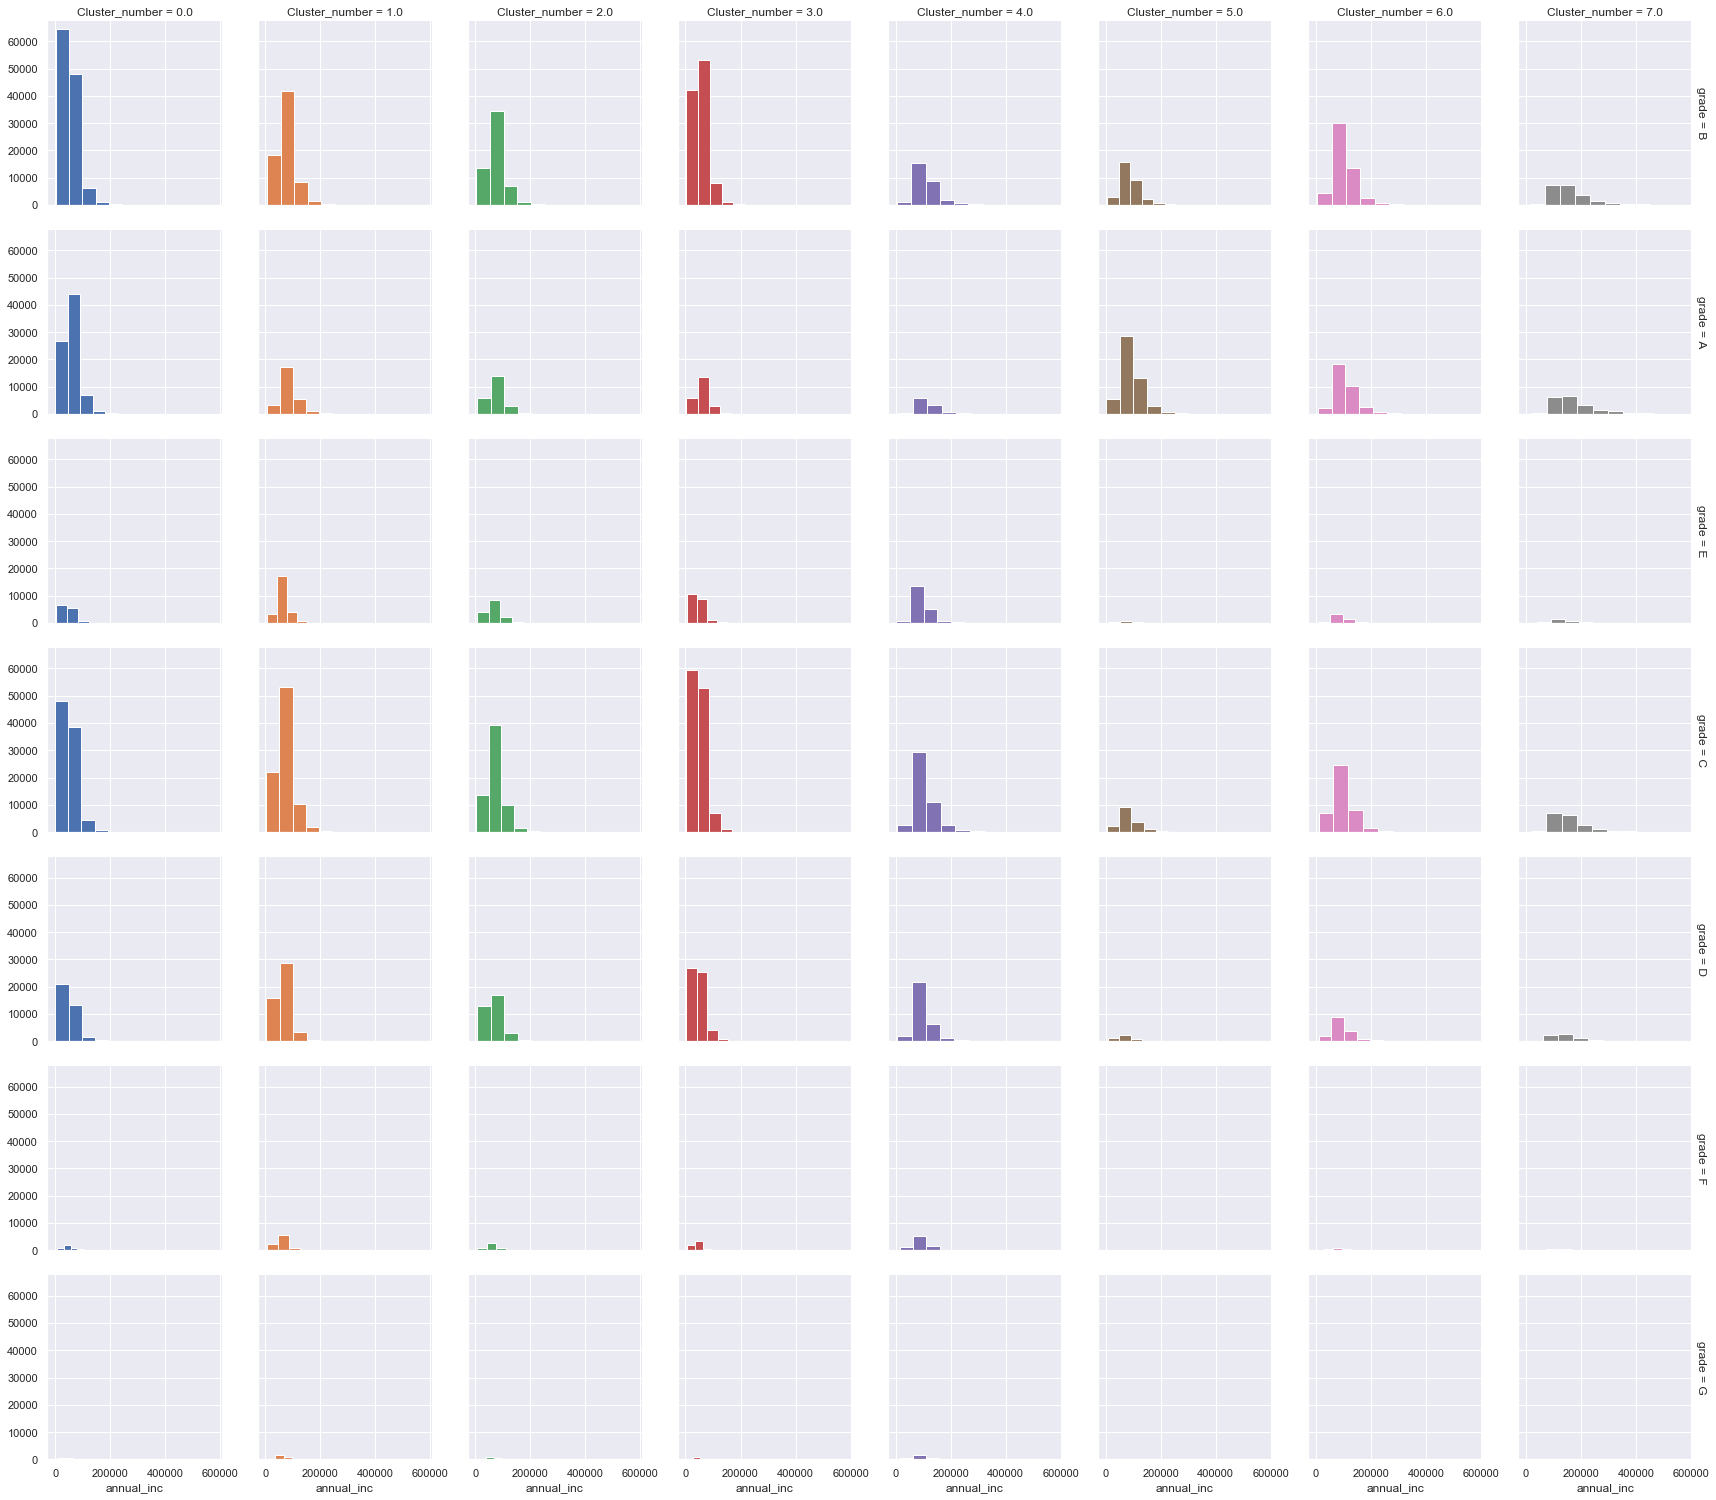

In [209]:
#Visualization
g = sns.FacetGrid(wholelendingtreekeep, row="grade", col="Cluster_number", margin_titles=True, hue="Cluster_number")
g.map(plt.hist, "annual_inc")

In [390]:
#Export csv
wholelendingtreekeep.to_csv("WholeLendingClubClustered.csv")

## Split into 2012-2014 and 2015-2017

In [339]:
lendingtree2014 = nlendingtree[nlendingtree['year'] < 2015]
lendingtree2017 = nlendingtree[nlendingtree['year']> 2014]
print(lendingtree2014.shape)
print(lendingtree2017.shape)
lendingtree2014.head()

(423810, 27)
(1299081, 27)


loan_amnt  funded_amnt  installment  annual_inc    dti  inq_last_6mths  \
0    10000.0      10000.0       321.13    102000.0  15.55             0.0   
1    20800.0      20800.0       706.16     81500.0  16.73             2.0   
2     8000.0       8000.0       261.88     33000.0  15.75             1.0   
3    28000.0      28000.0       872.52    325000.0  18.55             1.0   
4    11500.0      11500.0       323.54     32760.0  27.06             0.0   

   open_acc  pub_rec  revol_bal  total_acc  ...  acc_open_past_24mths  \
0       9.0      0.0     9912.0       22.0  ...                   3.0   
1      29.0      0.0    23473.0       41.0  ...                   9.0   
2       9.0      1.0     7203.0       16.0  ...                   2.0   
3      15.0      0.0    29581.0       31.0  ...                   6.0   
4      12.0      0.0     9996.0       17.0  ...                   9.0   

   avg_cur_bal  bc_open_to_buy  bc_util  pct_tl_nvr_dlq  percent_bc_gt_75  \
0       4349.0           973.0     89.4            77.3              66.7   
1        869.0          6811.0     54.6            90.2              50.0   
2       1772.0          2255.0     72.5           100.0              75.0   
3      53306.0         13901.0     67.1           100.0              16.7   
4       2060.0          2689.0     70.1           100.0              50.0   

   tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  year  
0          58486.0            39143.0          9200.0  2013  
1          43100.0            23473.0         15000.0  2013  
2          33226.0            15949.0          8200.0  2013  
3         850886.0           199739.0         42200.0  2013  
4          30891.0            24724.0          9000.0  2013  

[5 rows x 27 columns]

In [341]:
# Drop Nas and year column
lendingtreeNoNA2014nyear = lendingtree2014.drop(['year'], axis = 1)
lendingtreeNoNA2014 = lendingtreeNoNA2014nyear.dropna()
print(lendingtreeNoNA2014.shape)

lendingtreeNoNA2017nyear = lendingtree2017.drop(['year'], axis = 1)
lendingtreeNoNA2017 = lendingtreeNoNA2017nyear.dropna()
print(lendingtreeNoNA2017.shape)

(391857, 26)
(1283186, 26)


### PCA and Clustering 2012-2014

In [342]:
# EllipticEnvelope uses Mahalanobis distance 
from sklearn.covariance import EllipticEnvelope
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor


outlier_frac = 0.01 #Fraction of outiers

ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(lendingtreeNoNA2014)




C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.992550874179869 > 213.502651280955178). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (209.313261753429344 > 207.633694807842687). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.328322874601724 > 217.310061928569127). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.790481180556668 > 213.457163694639519). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.313144292853423 > 212.471077614557714). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.399882201466653 > 212.991312816861438). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.382257295622139 > 209.761293220454945). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.222998639423366 > 218.813122080692352). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.242634847112157 > 212.600526792898336). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.757150047833193 > 216.128138079357285). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (210.289129755068359 > 209.723318318979636). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.154592562938632 > 211.516364996153357). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.366052561039879 > 216.232157464291816). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.099448155193841 > 208.705019660926837). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.016663656439050 > 210.309550054480837). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.234858714673351 > 216.877585144648549). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.659148645357448 > 214.509275933190196). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.140419132728653 > 215.656303791384744). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.992749156200404 > 215.696332235950479). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.064438957475176 > 214.549876040534173). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.257520636756396 > 212.251917494965255). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.366672567970426 > 211.319271022274421). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.908062927526970 > 215.675485455439542). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.944697260827581 > 212.642317238762786). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.449547632316040 > 216.374219082497518). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.095155431378942 > 215.292240767848426). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.957429735787997 > 212.725644402282398). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.765527282713464 > 165.284128856429305). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.443338374205922 > 206.183894933049061). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.293761510748936 > 209.059313886886287). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.671495604548085 > 212.190238500773262). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.593347331378965 > 215.999299986208229). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.936362289779396 > 214.891223807110634). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.313405609204466 > 213.324809190409155). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.389360071004262 > 215.641672213465085). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.597651979385290 > 214.283633145510464). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.286251578511383 > 211.771298322523648). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.520686720707886 > 217.699245662961943). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.044007984273435 > 211.213005942678507). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.031422815720873 > 214.423438616314883). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.834527961620552 > 213.332003374507821). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.348402482350878 > 215.665764757743545). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.339160903099042 > 213.958884342193556). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.473784144522028 > 209.787683312351987). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.700387668596790 > 215.687268039807066). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.217043100232218 > 211.123682249923633). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.607073365723664 > 215.038610086329470). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.456100987649450 > 213.757299968223521). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.665543772960376 > 217.293459729693126). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.354045287748960 > 216.990370332001248). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.258191524098606 > 214.899040859368085). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.459720892694378 > 215.915878606635260). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.153134105687030 > 216.602294847850857). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.686144619229395 > 211.897772821817995). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.750218029423252 > 215.642587041638166). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.031672483965252 > 213.865868679798240). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.438195646850573 > 213.747365668622706). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.590474663735733 > 216.928826821034534). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.428626876282863 > 210.794689929987385). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.884229065477854 > 215.977509454851145). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.577542774297314 > 215.905694057764464). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.018459090382919 > 214.765106309091067). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.458770720403209 > 215.877793193772192). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.899478445962586 > 211.714247276967768). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.335153341017048 > 216.391288629743258). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.858923721053259 > 216.616293066525685). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.166324991036561 > 213.796804380068863). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.849835417457399 > 212.528864145197645). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.750958874864210 > 215.497055783182930). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.914223216759069 > 207.343145504117473). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.193134916601849 > 214.715625165740192). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.844935702659114 > 214.643877312885451). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.768060291550256 > 212.897127704403545). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.894664852227407 > 216.091821364565561). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.481176517305641 > 213.738021781456894). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.934472202479043 > 214.596385265923658). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.905622671115282 > 211.600414656409413). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.987910046960735 > 215.458324481100391). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.968125130531632 > 215.310328070644431). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.523562239707303 > 217.513621306284563). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.175223929297630 > 214.101045193694375). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.581188977973881 > 214.048010771417154). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.373636266232893 > 211.477256935933866). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.454634867855617 > 217.057729356587572). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.586924145189158 > 217.574448763740293). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.449466640250961 > 218.569104038753579). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.192768884852939 > 211.688769621930788). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.974565602412582 > 213.580079437995323). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.550767050468409 > 216.303458671001550). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.672778434772766 > 214.114117063174234). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.396512623577735 > 214.466204120054954). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.503502987504362 > 215.728197109317421). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.531383612926845 > 210.937096015554346). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (210.203681396586632 > 209.865746028479009). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.815996951836951 > 216.139459183779081). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.246169144931116 > 208.320243225041196). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.823100271007917 > 215.728354242488251). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.081898550251282 > 216.114564866441498). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.562400774983530 > 215.210754060868425). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.397221569532206 > 216.421190390194567). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.457556394603841 > 217.069692763325463). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.371378707217190 > 213.964850995479907). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.381782858802069 > 216.136288587463355). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.365203571084578 > 210.480451582913787). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.370340321980279 > 215.977605290454079). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.020196236118693 > 213.202879144613689). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.287483221228143 > 218.159593013867379). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.762665062648381 > 214.942649571967564). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.303761618427188 > 213.571167237971423). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.594086407397953 > 216.589885835910991). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.833272781019787 > 217.357518506097421). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.970244367387210 > 216.483038437152629). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.992094925081886 > 216.584155127351977). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.759982092743741 > 214.143371346331634). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.787292632164025 > 214.126714573978830). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.516858736285030 > 217.754656100936643). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.282094560224976 > 217.722363544636039). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.524830701038780 > 214.066120149130398). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.075697921725208 > 212.951853470517932). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.806976416970883 > 217.065017967014029). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.830083657165432 > 213.925327747532009). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.845661929035487 > 213.936021041115282). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.927640094543705 > 216.610789285145955). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.821691529311607 > 214.398306244243088). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.095180426463855 > 214.020811766890859). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.766717581442066 > 218.034936566850831). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.892320130661204 > 215.216250093319900). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.044613920431317 > 204.664127399744558). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.046741356972092 > 211.992753320948111). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.920761689219432 > 214.867072234598709). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.810875231278033 > 210.645156970908033). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.053983414235120 > 209.017080099120392). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.406110297616976 > 215.768231925246937). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.899920360774416 > 215.086130480886908). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.878309784901006 > 212.560970907377140). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.744320767238889 > 211.535082983519374). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.347561206122606 > 213.260466143142395). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.527043661835023 > 215.618537838342348). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.681963323642236 > 216.811259933363147). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.595964772602457 > 214.982347196878749). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.678901401691803 > 216.572957734248973). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.243224109186485 > 215.898495286294320). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.359860129612315 > 217.309165720530956). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.120256840804160 > 216.587996531593319). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.684792005302910 > 211.734238111967699). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.966773411908093 > 206.711896460582778). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.730135898612559 > 217.076353934949054). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.778393238513075 > 214.521312291490858). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.945675021659071 > 214.114916667827202). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.824262599570517 > 212.020702748805348). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.455583239165492 > 214.649499719337228). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.446919712427047 > 211.974931814833013). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.812850770680171 > 214.633201625350353). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.764768432041990 > 214.955713238820039). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.732663615955857 > 210.151491360020856). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.856560356389679 > 211.600933077304234). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.527854865546743 > 217.035109096826119). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.973679846698133 > 212.767603763617529). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.101304840321149 > 213.878121262977686). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.667907737415533 > 216.250577854808995). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.402464092030527 > 215.527381436915846). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.852103697467214 > 213.807550640942651). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.540847156999632 > 217.402777062744406). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.788948358626584 > 214.282760088844384). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.936287015826991 > 208.296399635883091). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.534494077011146 > 215.296605736400153). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.428720322784898 > 213.881825636204127). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.428953205322102 > 215.365880688468934). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.981317964657137 > 214.397498800588778). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.996577882449486 > 210.723534898877119). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.361409448744183 > 213.264831556508483). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.827223558148859 > 216.229253995040011). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.884910131501414 > 211.852435523661626). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.831198999387652 > 214.598996184633165). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.710846558907150 > 216.494344895894756). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.130649269295986 > 210.548451991785356). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.109395743800292 > 215.725615397672755). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.140787332815279 > 215.481279855261135). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.069130652095652 > 215.713149141932547). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.562654862859659 > 215.503132964497809). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.150638757736090 > 214.329733981033257). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.090801775263003 > 212.690638091286672). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.121905346614028 > 213.583108669289345). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.052293646951398 > 210.721450809598252). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.794049980593940 > 212.939765400815503). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.642815494464543 > 215.623144813709274). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.387667045158622 > 215.524575601035565). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.459978019876615 > 213.167790042867580). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.880924640892545 > 211.827042702400718). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
         store_precision=True, support_fraction=None)

In [343]:
pred2014 = ell.predict(lendingtreeNoNA2014)
print(sum(pred2014 == -1) ) # Outlier points are predicted as -1
stats.itemfreq(pred2014)



3919


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([[    -1,   3919],
       [     1, 387938]], dtype=int64)

In [344]:
keep2014=pred2014==1

keeptree2014 = lendingtreeNoNA2014[keep2014]

keeptree2014.head()



loan_amnt  funded_amnt  installment  annual_inc    dti  inq_last_6mths  \
0    10000.0      10000.0       321.13    102000.0  15.55             0.0   
1    20800.0      20800.0       706.16     81500.0  16.73             2.0   
2     8000.0       8000.0       261.88     33000.0  15.75             1.0   
3    28000.0      28000.0       872.52    325000.0  18.55             1.0   
4    11500.0      11500.0       323.54     32760.0  27.06             0.0   

   open_acc  pub_rec  revol_bal  total_acc  ...  total_rev_hi_lim  \
0       9.0      0.0     9912.0       22.0  ...           22300.0   
1      29.0      0.0    23473.0       41.0  ...           43100.0   
2       9.0      1.0     7203.0       16.0  ...           20800.0   
3      15.0      0.0    29581.0       31.0  ...           54200.0   
4      12.0      0.0     9996.0       17.0  ...           14100.0   

   acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  pct_tl_nvr_dlq  \
0                   3.0       4349.0           973.0     89.4            77.3   
1                   9.0        869.0          6811.0     54.6            90.2   
2                   2.0       1772.0          2255.0     72.5           100.0   
3                   6.0      53306.0         13901.0     67.1           100.0   
4                   9.0       2060.0          2689.0     70.1           100.0   

   percent_bc_gt_75  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  
0              66.7          58486.0            39143.0          9200.0  
1              50.0          43100.0            23473.0         15000.0  
2              75.0          33226.0            15949.0          8200.0  
3              16.7         850886.0           199739.0         42200.0  
4              50.0          30891.0            24724.0          9000.0  

[5 rows x 26 columns]

In [345]:
scaler = StandardScaler()

keeptree2014std = scaler.fit_transform(keeptree2014)

print(type(keeptree2014std))

print(keeptree2014std.shape)

print(keeptree2014std.view())

<class 'numpy.ndarray'>
(387938, 26)
[[-0.5689247  -0.56892312 -0.50714961 ... -0.6740814  -0.15909473
  -0.57408278]
 [ 0.73728305  0.73729189  1.08065219 ... -0.77115167 -0.54664123
  -0.2695475 ]
 [-0.81081502 -0.81081479 -0.75148708 ... -0.83344673 -0.73272291
  -0.62658886]
 ...
 [ 0.72518853  0.7251973   0.28961736 ... -0.43373376  0.69303766
  -0.61083704]
 [-1.53648599 -1.5364898  -1.57332698 ...  2.99999602  0.13157751
   1.43690018]
 [-0.5689247  -0.56892312 -0.31559728 ... -0.52907536  0.29433715
  -0.34830662]]


In [346]:
from sklearn.decomposition import PCA

pca2014 = PCA(0.90)
pca2014.fit(keeptree2014std)

pca2014.n_components_



12

In [347]:
pca_components2014 = pca.transform(keeptree2014std)
pca_components2014.shape

(387938, 12)

In [353]:
keeptree2014["index"] = keeptree2014.index
nkeeptree2014 = keeptree2014.reset_index()
nkeeptree2014.tail()


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


level_0  loan_amnt  funded_amnt  installment  annual_inc    dti  \
387933   423805    18400.0      18400.0       432.64    110000.0  19.85   
387934   423806    22000.0      22000.0       582.50     78000.0  18.45   
387935   423807    20700.0      20700.0       514.34     46000.0  25.65   
387936   423808     2000.0       2000.0        62.59     83000.0   5.39   
387937   423809    10000.0      10000.0       367.58     46000.0  22.78   

        inq_last_6mths  open_acc  pub_rec  revol_bal  ...  \
387933             2.0      18.0      0.0    23208.0  ...   
387934             5.0      18.0      1.0    18238.0  ...   
387935             2.0      18.0      0.0     6688.0  ...   
387936             1.0      21.0      0.0    11404.0  ...   
387937             0.0       6.0      0.0    11325.0  ...   

        acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  \
387933                   5.0      17353.0          2203.0     89.6   
387934                   5.0      13864.0          5569.0     54.4   
387935                   8.0       4089.0          1822.0     78.6   
387936                   7.0      28172.0         36402.0     23.4   
387937                   4.0      11495.0          2175.0     83.9   

        pct_tl_nvr_dlq  percent_bc_gt_75  tot_hi_cred_lim  total_bal_ex_mort  \
387933           100.0              80.0         311049.0           184117.0   
387934           100.0              20.0         263367.0            47136.0   
387935            97.6             100.0          96582.0            73598.0   
387936            85.2              11.1         640841.0            50896.0   
387937            90.9              50.0          81470.0            57477.0   

        total_bc_limit   index  
387933         21200.0  423805  
387934         12200.0  423806  
387935          8500.0  423807  
387936         47500.0  423808  
387937         13500.0  423809  

[5 rows x 28 columns]

In [354]:
cols2014 = []
for i in range (1, 13):
    cols2014.append("PC" + str(i))

print(cols2014)

PCdf2014 = pd.DataFrame(pca_components2014, columns = cols2014, index  =  nkeeptree2014.index)
PCdf2014

lendingtree2014_pca = pd.concat([lendingtree2014, PCdf2014], axis = 1)
lendingtree2014_pca.tail(n = 20)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']


loan_amnt  funded_amnt  installment  annual_inc    dti  \
423790    32000.0      32000.0      1001.29    128000.0   5.65   
423791    12000.0      12000.0       381.04     65000.0   7.39   
423792    10000.0      10000.0       336.22     60000.0  26.72   
423793     5000.0       5000.0       191.99     70000.0  20.74   
423794    12000.0      12000.0       423.31    133000.0  10.12   
423795    13250.0      13250.0       372.77     57231.0  12.04   
423796    10000.0      10000.0       312.91     99975.0  11.55   
423797    12000.0      12000.0       327.89     90000.0  15.04   
423798     6000.0       6000.0       196.41     25000.0  12.05   
423799    10000.0      10000.0       332.10     45000.0   9.28   
423800     6000.0       6000.0       209.79     27000.0  26.13   
423801     8525.0       8525.0       217.65     37536.0  12.28   
423802    18000.0      18000.0       563.23     90000.0  10.33   
423803    10000.0      10000.0       362.78     42000.0  11.57   
423804    15000.0      15000.0       509.25     66000.0  16.22   
423805    18400.0      18400.0       432.64    110000.0  19.85   
423806    22000.0      22000.0       582.50     78000.0  18.45   
423807    20700.0      20700.0       514.34     46000.0  25.65   
423808     2000.0       2000.0        62.59     83000.0   5.39   
423809    10000.0      10000.0       367.58     46000.0  22.78   

        inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  ...  PC3  \
423790             1.0      11.0      0.0     5400.0       35.0  ...  NaN   
423791             0.0      11.0      0.0    15960.0       25.0  ...  NaN   
423792             2.0      14.0      0.0    16570.0       27.0  ...  NaN   
423793             0.0      10.0      0.0    26732.0       22.0  ...  NaN   
423794             5.0       9.0      0.0    18476.0       23.0  ...  NaN   
423795             0.0      11.0      0.0     3710.0       22.0  ...  NaN   
423796             2.0       9.0      0.0     8021.0       35.0  ...  NaN   
423797             2.0      13.0      0.0    25699.0       42.0  ...  NaN   
423798             1.0      16.0      1.0     4946.0       48.0  ...  NaN   
423799             1.0      10.0      3.0     9557.0       16.0  ...  NaN   
423800             3.0       8.0      1.0     6025.0       16.0  ...  NaN   
423801             0.0      12.0      0.0     5318.0       26.0  ...  NaN   
423802             0.0      16.0      0.0     8224.0       33.0  ...  NaN   
423803             0.0       9.0      0.0     3196.0       24.0  ...  NaN   
423804             0.0       8.0      0.0    16901.0       20.0  ...  NaN   
423805             2.0      18.0      0.0    23208.0       36.0  ...  NaN   
423806             5.0      18.0      1.0    18238.0       30.0  ...  NaN   
423807             2.0      18.0      0.0     6688.0       43.0  ...  NaN   
423808             1.0      21.0      0.0    11404.0       27.0  ...  NaN   
423809             0.0       6.0      0.0    11325.0       22.0  ...  NaN   

        PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  
423790  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423791  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423792  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423793  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423794  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423795  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423796  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423797  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423798  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423799  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423800  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423801  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423802  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423803  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423804  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423805  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
423806  NaN  NaN  NaN  NaN  NaN  N

In [359]:

labels2014 = []
for i in range(5,10):
    kmeans = KMeans(n_clusters= i)
    kmeans = kmeans.fit(PCdf2014)
    labelPCdf2014 = kmeans.labels_
    labels2014.append(labelPCdf2014)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf2014))
   

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[     0 121981]
 [     1  94628]
 [     2  27555]
 [     3  71457]
 [     4  72317]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[     0  81140]
 [     1  24219]
 [     2  52090]
 [     3 104836]
 [     4  87639]
 [     5  38014]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0 52811]
 [    1 22361]
 [    2 76052]
 [    3 31069]
 [    4 95846]
 [    5 36352]
 [    6 73447]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0 12229]
 [    1 68664]
 [    2 49350]
 [    3 88234]
 [    4 34631]
 [    5 37770]
 [    6 73120]
 [    7 23940]]
[[    0 34369]
 [    1 68200]
 [    2 11856]
 [    3 72906]
 [    4 37476]
 [    5 23772]
 [    6 87869]
 [    7  2252]
 [    8 49238]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


In [360]:
print(labels2014)
print(labels2014[-2])

[array([0, 4, 0, ..., 3, 4, 0]), array([3, 0, 3, ..., 0, 2, 3]), array([4, 0, 4, ..., 6, 3, 4]), array([3, 2, 3, ..., 1, 4, 3]), array([6, 8, 6, ..., 1, 0, 6])]
[3 2 3 ... 1 4 3]


In [361]:
# I want 8 cluster groups!
whole_cluster2014 = labels2014[-2]
whole_cluster2014.view()

PCdf2014["Cluster_number"] = whole_cluster2014
print(PCdf2014.head())
PCdf2014["Cluster_number"].value_counts()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.935870 -0.851042  0.498275  0.128040 -0.292012  0.687644 -0.009583   
1  1.874180  0.767311 -1.333113 -2.720980  2.019660 -0.741003  0.509752   
2 -3.121897 -0.462636 -0.202598 -0.265374 -0.470596  1.122633  1.122594   
3  8.163105  1.685631  4.244335  3.136421  1.661312 -1.542116  0.248134   
4 -1.200038 -0.725431 -0.812479 -1.655938  0.266583 -0.449603 -1.028426   

        PC8       PC9      PC10      PC11      PC12  Cluster_number  
0 -1.905942  1.410275  0.114685  0.004319  0.115552               3  
1 -1.642533 -0.302685  0.924343 -0.237330 -0.945049               2  
2  1.370444 -0.046393  0.767026  0.545838  0.090476               3  
3  0.125271  0.073290  1.737338 -0.686023  3.086852               0  
4  0.872467 -0.442255 -0.176151 -0.471850 -0.964359               1  


3    88234
6    73120
1    68664
2    49350
5    37770
4    34631
7    23940
0    12229
Name: Cluster_number, dtype: int64

In [362]:
# EllipticEnvelope uses Mahalanobis distance 
from sklearn.covariance import EllipticEnvelope
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor


outlier_frac = 0.01 #Fraction of outiers

ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(PCdf2014)

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
         store_precision=True, support_fraction=None)

In [363]:
pred2014_1 = ell.predict(PCdf2014)
print(sum(pred2014_1 == -1) ) # Outlier points are predicted as -1
stats.itemfreq(pred2014_1)
print(PCdf2014.shape)
pred2014_1

3880
(387938, 13)


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, ..., 1, 1, 1])

In [394]:
keep2014_1=pred2014_1==1

PCdf2014_1 = PCdf2014[keep2014_1]

PCdf2014_1.head()
print(PCdf2014_1.shape)
PCdf2014_1.shape
PCdf2014_1NoC = PCdf2014_1.drop("Cluster_number", axis = 1)
PCdf2014_1NoC.shape

(384058, 13)


(384058, 12)

In [367]:
#Recluster

labels2014_1 = []
for i in range(5,10):
    kmeans = KMeans(n_clusters= i)
    kmeans = kmeans.fit(PCdf2014_1NoC)
    labelPCdf2014_1 = kmeans.labels_
    labels2014_1.append(labelPCdf2014_1)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf2014_1))
   


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0  27556]
 [     1 121026]
 [     2  70012]
 [     3  71855]
 [     4  93609]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0  81397]
 [     1  87147]
 [     2 104773]
 [     3  23861]
 [     4  37640]
 [     5  49240]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[    0 35779]
 [    1 95120]
 [    2 75271]
 [    3 72590]
 [    4 52418]
 [    5 30827]
 [    6 22053]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[    0 23305]
 [    1 72323]
 [    2 12011]
 [    3 87676]
 [    4 48949]
 [    5 67995]
 [    6 37383]
 [    7 34416]]
[[    0 79382]
 [    1 36100]
 [    2 22597]
 [    3 11257]
 [    4 46524]
 [    5 32396]
 [    6 26545]
 [    7 64226]
 [    8 65031]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


In [402]:
print(labels2014_1)
print(labels2014_1[-2])

# I want 8 cluster groups!
whole_cluster2014_1 = labels2014_1[-2]
whole_cluster2014_1.view()

PCdf2014_1["Cluster_number"] = whole_cluster2014_1
print(PCdf2014_1.head())
PCdf2014_1["Cluster_number"].value_counts()

wholelendingtreekeep2014 = pd.concat([lendingtree2014, PCdf2014_1], axis = 1)
wholelendingtreekeep2014.tail(n = 20)

[array([1, 2, 1, ..., 3, 2, 1]), array([2, 0, 2, ..., 0, 5, 2]), array([1, 4, 1, ..., 3, 5, 1]), array([3, 4, 3, ..., 5, 7, 3]), array([6, 4, 0, ..., 8, 5, 0])]
[3 4 3 ... 5 7 3]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.935870 -0.851042  0.498275  0.128040 -0.292012  0.687644 -0.009583   
1  1.874180  0.767311 -1.333113 -2.720980  2.019660 -0.741003  0.509752   
2 -3.121897 -0.462636 -0.202598 -0.265374 -0.470596  1.122633  1.122594   
3  8.163105  1.685631  4.244335  3.136421  1.661312 -1.542116  0.248134   
4 -1.200038 -0.725431 -0.812479 -1.655938  0.266583 -0.449603 -1.028426   

        PC8       PC9      PC10      PC11      PC12  Cluster_number  
0 -1.905942  1.410275  0.114685  0.004319  0.115552               3  
1 -1.642533 -0.302685  0.924343 -0.237330 -0.945049               4  
2  1.370444 -0.046393  0.767026  0.545838  0.090476               3  
3  0.125271  0.073290  1.737338 -0.686023  3.086852               2  
4  0.872467 -0.442255 -0.176151 -0.471850 -0.964359               5  


loan_amnt  funded_amnt  installment  annual_inc    dti  \
423790    32000.0      32000.0      1001.29    128000.0   5.65   
423791    12000.0      12000.0       381.04     65000.0   7.39   
423792    10000.0      10000.0       336.22     60000.0  26.72   
423793     5000.0       5000.0       191.99     70000.0  20.74   
423794    12000.0      12000.0       423.31    133000.0  10.12   
423795    13250.0      13250.0       372.77     57231.0  12.04   
423796    10000.0      10000.0       312.91     99975.0  11.55   
423797    12000.0      12000.0       327.89     90000.0  15.04   
423798     6000.0       6000.0       196.41     25000.0  12.05   
423799    10000.0      10000.0       332.10     45000.0   9.28   
423800     6000.0       6000.0       209.79     27000.0  26.13   
423801     8525.0       8525.0       217.65     37536.0  12.28   
423802    18000.0      18000.0       563.23     90000.0  10.33   
423803    10000.0      10000.0       362.78     42000.0  11.57   
423804    15000.0      15000.0       509.25     66000.0  16.22   
423805    18400.0      18400.0       432.64    110000.0  19.85   
423806    22000.0      22000.0       582.50     78000.0  18.45   
423807    20700.0      20700.0       514.34     46000.0  25.65   
423808     2000.0       2000.0        62.59     83000.0   5.39   
423809    10000.0      10000.0       367.58     46000.0  22.78   

        inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  ...  PC4  \
423790             1.0      11.0      0.0     5400.0       35.0  ...  NaN   
423791             0.0      11.0      0.0    15960.0       25.0  ...  NaN   
423792             2.0      14.0      0.0    16570.0       27.0  ...  NaN   
423793             0.0      10.0      0.0    26732.0       22.0  ...  NaN   
423794             5.0       9.0      0.0    18476.0       23.0  ...  NaN   
423795             0.0      11.0      0.0     3710.0       22.0  ...  NaN   
423796             2.0       9.0      0.0     8021.0       35.0  ...  NaN   
423797             2.0      13.0      0.0    25699.0       42.0  ...  NaN   
423798             1.0      16.0      1.0     4946.0       48.0  ...  NaN   
423799             1.0      10.0      3.0     9557.0       16.0  ...  NaN   
423800             3.0       8.0      1.0     6025.0       16.0  ...  NaN   
423801             0.0      12.0      0.0     5318.0       26.0  ...  NaN   
423802             0.0      16.0      0.0     8224.0       33.0  ...  NaN   
423803             0.0       9.0      0.0     3196.0       24.0  ...  NaN   
423804             0.0       8.0      0.0    16901.0       20.0  ...  NaN   
423805             2.0      18.0      0.0    23208.0       36.0  ...  NaN   
423806             5.0      18.0      1.0    18238.0       30.0  ...  NaN   
423807             2.0      18.0      0.0     6688.0       43.0  ...  NaN   
423808             1.0      21.0      0.0    11404.0       27.0  ...  NaN   
423809             0.0       6.0      0.0    11325.0       22.0  ...  NaN   

        PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  Cluster_number  
423790  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423791  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423792  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423793  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423794  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423795  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423796  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423797  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423798  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423799  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423800  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423801  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423802  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN             NaN  
423803  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  

In [392]:
#Export to csv
wholelendingtreekeep2014.to_csv("2014LendingTreeClustered.csv")

## PCA and Clustering 2015-2017

In [403]:
outlier_frac = 0.01 #Fraction of outiers

ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(lendingtreeNoNA2017)

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.427935916188318 > 217.353357075084688). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.833768449524513 > 211.502385490268750). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.789289747068324 > 209.286342646023911). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.986391182019190 > 217.182903604412871). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.383491629084773 > 217.644976090863310). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.128401546656704 > 208.679113736894237). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.686014060508199 > 218.679969812539383). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.136441586755723 > 219.457130739295508). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.907906573740775 > 213.120401791979958). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.444434480200727 > 216.496965022667410). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.805322403647921 > 217.074757550266497). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.114079814540986 > 221.994800204355840). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.316349035175847 > 215.647832617087545). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.578473270202380 > 218.911765578156036). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.413155318508331 > 221.818533708567827). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.355615587051204 > 218.027748141323144). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.005654694512941 > 217.804914278429493). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.292612300538593 > 217.478371172798688). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.829852105725195 > 222.705128684547105). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.808902517544112 > 210.642089128426875). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.511731886980812 > 214.265329388727423). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.079505521733836 > 215.331568202542400). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.613576520937443 > 212.120636156662670). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.797314795566166 > 220.587422635342023). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.010165147303326 > 209.964583391575445). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.520402650213668 > 206.397000450533596). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.059944839783412 > 220.224233380105147). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.660942269891393 > 211.768900373285931). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.538590496690176 > 214.619614158325192). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.274719679969792 > 219.905536046679089). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (247.309500478224834 > 241.051263838489405). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.600505859820885 > 212.107797887009411). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.418459675033830 > 215.648985958469837). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.382147994417210 > 215.111266150354311). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.120326802402758 > 217.120153240276807). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.279217946385444 > 216.248137511587743). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.751519330377334 > 219.112619977323561). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.247343932166416 > 213.536240209396027). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.034763021690424 > 217.733049529028108). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.783370921709746 > 214.659750875658858). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.973715090262004 > 216.894159102582194). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.227341509715529 > 219.050178027174525). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.867454426438229 > 218.703834673138573). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.004245392684027 > 213.987973286452871). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.813149323055939 > 210.178502317125862). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.893065336775720 > 210.444131055415312). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.406650668037543 > 216.286072104865895). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.458144315940103 > 218.682892099096421). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.380786404737790 > 217.065745909503875). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.323041268541061 > 222.223039559146031). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.336092699202425 > 215.113840829694681). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.731523121613520 > 202.001342494367606). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.618261425535252 > 216.200940103554331). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.872448929236697 > 220.591554052104243). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.364953889774540 > 220.495272508304538). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.659141919079559 > 219.920328670159677). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.568580046809984 > 217.673061901589762). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.218175582421452 > 217.760004183733457). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.969053739748830 > 218.700157283332715). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.408424520816652 > 216.762320093950564). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.508153297422297 > 207.117216635823041). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.217149010192600 > 221.003166984356000). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.328613150366579 > 219.352733000925014). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.266637886474598 > 214.083523739225456). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.769300766578169 > 214.976394766794783). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.708938721618040 > 219.700046819291373). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.935198305925041 > 211.077382338744513). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.105001038996761 > 210.679801254714221). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.320535793236047 > 218.367127355479653). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (238.909166963966726 > 214.113721210589375). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.886226328921509 > 218.235707053201253). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.997795757575091 > 214.599128285091609). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.076742950415223 > 216.514620951068764). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.219263098504285 > 211.618112529549677). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.219837293196292 > 216.804580336088634). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.578438226657710 > 218.352325665453577). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.217695863240237 > 220.091672837563152). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.196365842354879 > 211.967334636681784). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.392709316118328 > 212.460541710507783). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.278255895174311 > 217.569446606839449). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.892857354161976 > 218.575113898460870). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.220464480977284 > 217.204356377713680). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.181199616403717 > 215.766269126241070). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.959758710188822 > 214.615291395036309). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.791878491969555 > 218.545007998256295). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.492356451104541 > 214.786087379835294). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.438003378763710 > 214.754055851050680). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.681687044062556 > 220.221505409146829). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.453510830598248 > 218.095005405799981). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (244.779522373579880 > 238.961597882067423). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.884933111778537 > 216.764459823820062). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.007425902401081 > 209.877269656666982). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.903585350871822 > 215.390526893073257). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.210322989177030 > 220.964655931882874). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.441437116651741 > 212.982773914166131). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.306789431404525 > 221.075978711174145). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.653905955309256 > 214.039584853337942). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.606973900742560 > 217.273488977141398). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.811772298054507 > 221.656756212893299). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.608375965027648 > 214.863306215562318). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.136035550667458 > 218.703368822200019). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.829951362849613 > 211.407837504377937). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.172030961168105 > 215.254836555711393). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.170049664791662 > 211.878507972430583). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.058831574149337 > 219.372119702275569). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (212.007278089962625 > 205.115767667425672). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.343531523069402 > 204.973026308000016). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.269936356093694 > 213.951029483238131). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.120263161149552 > 215.396565960313524). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.333182112549792 > 215.369841624957900). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.428883846592498 > 217.402114467891892). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.740230213846758 > 214.058019060301035). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.996016135634449 > 215.438585499930070). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.881266376556653 > 219.764944557582169). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (213.619862010586019 > 204.899705458037090). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.270238749217526 > 217.833750579818513). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.058516778091786 > 210.843559186603841). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.414886835046531 > 215.741047735658555). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.824296275409210 > 216.646206105349734). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.176593090662948 > 218.325394872448726). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.740187934915070 > 212.756693146951875). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.220782300324345 > 214.580694660658395). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (247.255504656788304 > 243.635786709550075). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.384040364449106 > 219.646873480959187). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.055616163183657 > 221.577682909198955). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.446700666077760 > 221.931222466662234). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.764134879677300 > 220.095042633683192). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.864893042781119 > 219.873571938212933). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.402324343790326 > 217.438128878129248). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.222553176074797 > 217.063971702722114). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.331047252172993 > 221.664036695321329). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.852569860952315 > 219.925543257570041). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.627401644882497 > 220.931245094583147). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.420553871207716 > 219.648654606616844). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.511876503672028 > 221.294130835503466). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.115672050469357 > 216.208206866032242). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.013787025276486 > 212.716384970438810). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.548538635065000 > 219.724061693720614). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.176616191312746 > 219.194305929045129). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.529009135557146 > 221.177478914613516). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.934163112477648 > 215.605952290677010). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.220889967208819 > 222.832514531858521). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.012903320611855 > 219.016229398254097). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.613547175873748 > 222.472131730699516). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.596329253708120 > 221.727353618509227). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.314372106115684 > 221.228210638274220). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.552303795093451 > 221.027866694564864). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.221191808788063 > 218.041062098522247). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.760019545792773 > 222.384105803575864). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.267514180072197 > 219.815006081454698). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.992946430190699 > 218.744587672518179). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.069299535374029 > 220.902850897360310). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.931605855796846 > 213.097011613852146). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.363625818426073 > 216.630831025852132). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.244327627070163 > 214.974715106378710). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.720804422926108 > 220.939691400915478). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.937503679366785 > 218.094547255297186). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.450074176225712 > 211.160751568173396). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.237150407752154 > 219.633332107513780). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.397692551009754 > 219.207228717594660). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.553281171838421 > 218.225040110050656). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.992693083952275 > 214.350152759058972). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.708006014294909 > 216.242768725099324). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.015008279775287 > 219.680900665735692). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.943013748846312 > 217.393816197593367). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.426167921414219 > 222.025057481318214). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.058382720273926 > 214.549218033530394). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.683707838401290 > 220.792025659426969). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.668972975400266 > 221.028980709557629). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.581268547011433 > 220.865814174771657). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.110540854165350 > 215.367575923602203). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.269856517971874 > 218.615797580084092). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.719453987730390 > 221.406810173876863). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.638394394712236 > 218.005872107848177). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.878156997941943 > 220.986781898963130). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.535099181591136 > 222.667538953555209). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.035384053923735 > 221.950263091656922). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.072914301607540 > 217.186052425503476). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.645364782539389 > 214.037504187906791). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.592247239814753 > 221.567821625519997). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.372536381076173 > 220.123584721083063). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.890706874313253 > 220.349153607787144). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.253429509989758 > 218.404144743756177). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.860152534638956 > 221.825853538537871). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.613598055517059 > 214.501214820366272). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.630292847781675 > 217.140669034580299). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.514953526977791 > 219.331615569989310). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.869813590607521 > 215.409146552750911). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.244806574135168 > 215.209547749690813). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.850897607610193 > 218.440817495182188). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.104548365388354 > 221.118017040535563). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.246978276742453 > 221.231389358636250). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.999124902383386 > 221.250042543539422). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.654399350589046 > 219.003559320259143). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.827113195420083 > 212.691371865256144). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.813415132688704 > 217.648623083341732). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.915831357025752 > 221.117528375452366). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.702841153123870 > 221.320513519727825). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.101031733744520 > 221.588054901617454). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.272001654625285 > 218.646041324038436). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.254252015412050 > 220.946078234383009). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.424153228024323 > 220.373582749621107). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.923139791444470 > 218.723373302866946). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.085121928304432 > 218.596282741418122). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.889273763539137 > 220.788880021259246). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.791865395060995 > 218.718161002664715). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.882422159764815 > 222.433905617252265). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.473741876007239 > 216.618120361745497). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.917865232946241 > 220.819809788709591). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.160379164670701 > 216.865134848157652). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.834667756170063 > 219.549571396959692). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.914339309035995 > 214.935113197242686). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.350109087848523 > 218.984988995647200). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.448939676522684 > 215.542494180187191). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.602574190546932 > 220.261174532904136). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.353360374288059 > 222.198854521561088). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.701271496210467 > 219.268282253865266). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.108470153932274 > 214.704474757378193). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.451606116224099 > 214.475213701365362). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.648668287426943 > 217.847066504874931). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.726717687915880 > 214.528844776249969). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.569497523918670 > 219.449431834117860). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.123823382627819 > 217.984790986120970). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.166242848903437 > 220.508799920986434). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.464744881938344 > 218.460730597520012). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.286352261575189 > 214.396395851571270). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.220845375683240 > 219.688245599629539). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.100447704523390 > 222.038226776026249). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.128194208230326 > 212.207797923074594). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.267207416029805 > 220.861009842876399). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.072259933488311 > 217.853689585679859). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.350159185408160 > 214.947219857512891). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.358364467685931 > 218.894167173392532). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.767733128881133 > 223.351782575805714). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.934908238045153 > 217.294348151974191). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.304843273224634 > 220.075018432371650). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.308385249515908 > 207.983129390268630). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.617332039496773 > 220.996577753441670). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.449782569163858 > 219.645239126815426). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.562779748710796 > 220.952487817017158). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.212823033450633 > 221.589752691752892). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.227563978100676 > 220.751149353988609). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.875446450941467 > 221.022478975599455). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.235605122166533 > 217.768667880278002). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.146632954333597 > 221.126674825831344). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.293086524676255 > 220.225479254791765). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.744069572299310 > 215.350614962026583). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.651675620145397 > 218.424086826367301). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.703726224897025 > 220.611484307892141). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.432921676820541 > 216.074245405878003). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.728483404145294 > 220.726122434755837). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.089911251943562 > 219.988283277750156). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.663731661701291 > 213.505009919340409). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.970443685533809 > 220.060904295380624). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.406301485966907 > 213.856774696134210). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.856421553953481 > 217.251922047576159). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.134010229856898 > 212.660800260673113). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.593108939256865 > 216.705172915536707). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.502365334999467 > 220.462946585762040). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.467083404175185 > 218.668385334576044). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.194815346780558 > 221.184463777288926). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.715180149351426 > 208.920587041089590). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.580681101737923 > 224.420935232511766). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.413779861741631 > 220.599987328999674). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.022811807698304 > 217.322370036814561). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.687197720776595 > 220.030059542061082). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.251631583416128 > 213.829624910215870). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.426313591111523 > 224.329608711149604). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.886087460804248 > 218.120014810287984). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.117316656768537 > 218.409511163930460). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.765468488731955 > 219.950343932978512). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.635686498339908 > 221.836262027913278). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.747917729480292 > 221.857491697716341). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.925247350111391 > 217.076345776668830). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.814938253095534 > 219.673098257559985). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.873466013762027 > 220.395291340739277). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.488834624068289 > 220.345928335428312). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.034644914677870 > 217.929569599834053). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.707364289283760 > 213.138671113240633). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.566902641656640 > 221.237334145545191). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.131752539112142 > 220.965374327065291). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.412833686920607 > 221.125383242790235). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.056312948177464 > 219.498261982683971). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.805574328059379 > 220.541708161581795). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.885109475276948 > 213.796452425441061). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.465075340692266 > 218.408741419765647). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.910216683846329 > 219.993836710092836). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.566882461747838 > 220.080843510263151). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.804523019615601 > 221.415383760161006). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.096824953776746 > 218.646316991388829). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.914029407635326 > 220.597812285810221). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.986868526634709 > 219.251665472223095). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.744887205940046 > 214.724913971640291). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.127928151168248 > 222.104573786912709). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.957634678726890 > 222.401901360472323). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.276805332445434 > 220.590741121673148). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.539175644188163 > 218.908010742678243). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.917948170993299 > 221.319285563189482). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.584886912170106 > 222.906397913338765). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.808325697730623 > 221.500400725086820). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.510587983587442 > 219.504924970800431). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.541040629677468 > 220.611514119787500). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.548983417172622 > 217.466869093849539). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.353711080648623 > 219.796541800583185). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.416070507574545 > 220.968471375075978). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.303727749204114 > 221.706224110775963). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.578348986451886 > 216.546193526272560). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.110245382861876 > 217.605736629373610). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.886560889315092 > 223.533333787783420). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.295272745976234 > 208.377761020212176). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.243287959003084 > 218.341773404114662). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.774798446432357 > 219.661332629445809). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.152535106863525 > 211.827372090774958). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.826834959657816 > 219.081660389055600). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.980573421478738 > 218.366933366645839). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.417006597465871 > 221.275581815608916). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.226068717640061 > 222.879320626351614). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.718943617607465 > 216.100332072134734). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.211745831180167 > 219.807020935007444). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.734290827215290 > 219.671859577591334). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.012029562582427 > 216.333672267013014). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.801945819733220 > 220.586726288343726). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.192204496894647 > 214.172813074530069). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.924824408436280 > 220.186448794846655). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.073902515876682 > 218.706293304316972). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.728028856917888 > 218.095610132305495). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.108147110707847 > 221.321145313400706). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.586575273908466 > 219.281718920963584). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.025366009456064 > 212.028730851611783). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.691298896636113 > 213.042366124431055). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.129535542798124 > 221.632989980319621). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.484853389135026 > 221.258350253488516). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.811225155327406 > 218.768759179311047). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.966624720899688 > 220.253506476779478). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.640534565435956 > 221.523701859957356). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.157677335832659 > 220.301530874902539). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.922307020171445 > 214.798564919980834). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.274013994624255 > 219.610080796049658). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.130882525118267 > 220.656745280792705). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.772259773507557 > 211.650235430563271). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.822533866055153 > 215.491721508143826). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.125638342970944 > 219.787836310003399). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.682574663182180 > 217.817203029471273). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.937381012715264 > 220.682370552039316). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.468574482616418 > 218.903447530044076). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.684555624823588 > 218.516433858017422). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.164038560202641 > 217.059157428271249). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.406122427466926 > 211.949318090428648). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.573686494310323 > 223.571126578972155). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.245006590363971 > 222.624892945249712). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.811777760600449 > 220.349998666440143). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.084526993100383 > 222.067363304969632). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.541869628100926 > 219.355217797071504). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.630504717783396 > 220.772062631258478). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.205976222690936 > 220.412309385713939). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.325434711215621 > 219.825784385286568). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.528807708347244 > 218.911223070169285). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.799686279793178 > 221.561525145565554). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.885922980255202 > 222.010106200598443). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.230486715912917 > 221.070698038420687). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.308260510573660 > 216.442895078150201). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.837900091397614 > 222.203896731823733). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.612639075286722 > 219.176356653972789). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.666550812997883 > 217.893712240444756). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.484784885970726 > 213.818195808060835). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.737177919013561 > 220.335058936438116). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.994359536375441 > 217.496100425894468). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.643314531633791 > 221.568062947095399). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.649320105670540 > 222.622707075284069). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.143395575618882 > 220.612543709165578). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.554971156125504 > 217.162146563546855). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.240246484177788 > 218.301842916868168). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.500754748599888 > 220.507708912406144). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.727885016980650 > 217.906204108345065). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.007529159360104 > 217.826845687906683). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.666826159741674 > 217.446844291067833). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.605478115261320 > 218.284120976609557). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.892830382074294 > 215.359785132300829). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.815192188101804 > 219.577251595376168). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.663735877064710 > 219.399187505446008). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.223113076369458 > 218.041967397885259). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.559593228436711 > 217.453902748948792). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.884161160586160 > 220.430055998843386). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (226.182735691366418 > 221.440012482469598). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.683530021603787 > 212.371909082965459). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.527711553568849 > 217.716768347969492). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.908547509093836 > 217.606711057182679). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.581530439894635 > 220.253664266891889). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.812316588079710 > 220.376693611825601). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.622830078233989 > 221.106765592584651). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.863425227755670 > 218.386305230937040). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.922335925092852 > 217.262736058696106). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.537839452809322 > 220.869560047313399). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.258464358950818 > 221.123767358350449). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.859792118208787 > 221.833990926374781). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.804013476347620 > 211.398982079499234). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.164783671555142 > 219.350871685298102). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.754403162116603 > 216.557051082637685). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.990700253362604 > 221.178668022614829). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.886454234703280 > 219.955839529539361). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.634368188861970 > 219.656151970435616). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.279028390399446 > 218.820344793190259). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.604816555669743 > 213.372544237213503). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.995812789170628 > 221.465561464232479). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.153740225681958 > 209.605069710203082). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.495416488391413 > 213.987891977652367). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.081912452100056 > 217.635462655333754). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.458239419153927 > 215.805483699315658). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.588518413307469 > 221.338743171176986). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.850371778252338 > 222.730513067514323). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.929454026650603 > 220.512025453327823). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.920517871074367 > 223.034135072595518). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.620394821039326 > 221.495743844108034). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (216.739965958182466 > 215.460823507478437). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.340453639127986 > 221.606932133679464). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.296355982480634 > 217.749327994969775). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.965482006796719 > 218.518228757729645). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.758673831222836 > 219.491957126919743). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.614285286272150 > 223.590219079009728). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.462897633146241 > 211.844133861753079). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.835763021451385 > 215.815451016681351). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.250299248314292 > 219.151723469813106). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.801605197147552 > 220.127232575405429). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.583966553942190 > 215.683689614385713). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.686322063097094 > 212.553089632269035). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.750561156067079 > 220.871300373417540). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.098720394987055 > 220.597350584769970). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.647165163761343 > 219.922491056534170). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.762290334398756 > 218.076706430388242). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.908673876116922 > 220.558943039651467). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.366672503510557 > 221.837762819169797). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.713568444484537 > 211.073893537530950). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.624921756762177 > 219.393033185865136). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.348681387560333 > 221.561678940855273). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.375997826003726 > 219.882355842840411). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.894173498500606 > 216.923060656431915). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.639065142211081 > 217.030487339229552). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.742242258272114 > 214.460033987203900). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.883791410784710 > 220.601751248984016). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.307693990867165 > 220.357636066547144). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.822760867660122 > 219.053783976562158). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.918516383547825 > 220.249183303283729). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.088897251471337 > 220.837945339716526). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.757358079916287 > 218.614531083983991). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.000492845577838 > 220.598699012174222). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.934878916181788 > 219.239869361280739). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.400507237982993 > 220.977781642806832). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.585496554935389 > 222.576091638893189). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.290994638371870 > 221.047098652780392). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.936287808762359 > 222.827261606545989). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.606812347448653 > 219.531071160227498). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.837696597256013 > 222.411508035285976). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.508894299395081 > 222.298086243821871). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (226.123364270348759 > 222.476754426472581). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.413380574535068 > 220.853258576314829). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.681718112427518 > 220.364630284448737). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.027977036112389 > 220.535289762579453). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.720635421417143 > 218.195028925390744). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.865451533313006 > 218.063632325652577). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.542017441176256 > 220.126855189565816). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.361468342738618 > 216.632592215043417). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.832627860930444 > 217.715235575601326). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.997332989549420 > 219.436271931083240). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.408653907338248 > 219.292099723469306). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.428111560916307 > 213.139199531858054). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.277251010968939 > 219.987069196840650). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.612305915707651 > 214.855064838377672). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.814160150473896 > 223.324887097240406). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.040624010483583 > 222.720414029495174). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (214.256378395499212 > 212.285023133430286). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.036290529650444 > 218.272784169637617). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.949993450611203 > 214.861526889959322). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.142631231784776 > 219.315798199601062). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.002192456646640 > 220.130473462978159). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.402284313708179 > 220.179790667643744). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.671423875065472 > 220.351099526358581). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.818044293457888 > 222.169035803265245). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.950181619022004 > 220.395901104693593). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.267839352970043 > 221.141737234713645). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (215.257024752506823 > 212.573166412590354). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.964480472824107 > 219.218264746273235). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.777088541706888 > 219.811819853239797). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.280573780390284 > 214.072805845528222). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.463408540467810 > 221.320173539009289). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.169338242341041 > 220.245703196789549). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.153520665357917 > 217.864450977591559). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.310843397725961 > 219.538299465043508). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.790303070904542 > 221.533925449325579). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.081941535735837 > 221.258756026723034). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.993483726115954 > 222.571868896903879). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.253523934939949 > 219.967217022832529). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.957928125100892 > 219.827891524977645). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.859108764580611 > 215.521844755909797). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.211216058967238 > 219.184038484859229). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.080480293965678 > 217.506172735880995). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.748342191190773 > 222.418606616070747). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.539212401743129 > 221.419799889301714). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.723176854224391 > 220.414557404947516). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.461618542060620 > 218.268734851072509). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.327632485922692 > 217.202327311543399). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.506313004057290 > 216.716395474225976). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.241337662012256 > 215.462496257649747). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.869307547729505 > 221.064634490591203). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.033277439161225 > 217.738724902939168). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.509553372542285 > 221.786357748806466). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.998251615013231 > 219.009686167580469). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.443374451963592 > 220.196985969463270). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.696768393035541 > 219.228560196709822). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.612205873428081 > 221.323655612093489). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.625070784124773 > 213.697121717663038). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.017502167662883 > 220.086649021680273). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.375390719825958 > 214.384510662603475). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.031318623987687 > 219.503893462663228). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.075813030601012 > 222.411461378951401). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.660542519643599 > 219.627967435924631). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.680188767803259 > 221.217289233344445). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.122137284306774 > 217.321018653083712). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.723687918839488 > 220.077988883572687). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.588175679116972 > 216.994008761836056). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.871828553342056 > 215.277108032639461). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.196335001299076 > 214.374101258684647). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.364325036905115 > 220.083041328835321). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.903318073008933 > 223.564330904574746). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.413036535756305 > 219.507439592741974). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.496344462269462 > 221.475439748444899). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.526993706048017 > 222.097605940976393). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.506289576585885 > 221.231535115123791). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.534736694622723 > 219.017638634941704). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.558074934945068 > 222.126724945739824). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.582498527249328 > 214.902714667654010). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.356787788031937 > 219.566432489180386). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.934423842102376 > 219.560294723796716). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.091162076067263 > 220.558838168432658). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.100622550242264 > 220.128707213398883). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.773220728972490 > 221.688703092719805). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.623641661947772 > 217.157644533744531). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.994640832573367 > 220.287994790939393). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.769101061367024 > 221.179325387167466). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.653202919635817 > 221.897573617642337). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.887566105005106 > 220.753067672848715). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.533247694026443 > 222.374428747720430). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.114001857755284 > 222.852492557689231). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.513028807596271 > 217.411861226312766). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.858159407039523 > 221.843937732772986). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.526297973864217 > 219.502385304303829). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.984054591291795 > 219.075928020353501). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.897073716650709 > 217.984568876567550). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.920574815116538 > 217.208854211575442). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.321262647267503 > 220.224759313311438). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.284072635867773 > 222.196841640095755). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.991573243973761 > 219.122669542576915). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.182497551542525 > 214.572182972936019). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.271145930690039 > 215.635208171249531). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.863706233657837 > 213.973885258849833). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.352637922533887 > 219.469706427973335). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.502824312485359 > 219.498204327184084). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.343656234311766 > 219.687166522667439). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.994222738421001 > 218.302912703099992). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.773634490126994 > 219.327102595357474). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.609249101129194 > 216.178716934430611). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (218.313770044050187 > 218.186667134594870). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.682344500147821 > 217.979124300661510). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (223.629703322411842 > 218.956640410471863). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.069059595825053 > 217.965941043485088). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.771994615156274 > 213.883308965097399). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.725164295944467 > 217.236904451708341). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.900696930928291 > 217.657818190594270). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.725726925846232 > 219.707587414151050). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (225.257815570902522 > 223.032853967975086). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.227967421433192 > 219.905468128433682). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.747884220922685 > 217.893228412293041). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.124403792022918 > 205.961202415907309). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.168583998805502 > 221.156746316997300). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.968574948452101 > 219.486299761789439). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.521655656166246 > 221.564121685674962). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.388262849842391 > 219.977543382689049). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.542754161736269 > 219.103151528029997). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.902162949669673 > 217.043347996932312). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (217.314973731775524 > 217.211191203470435). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (222.373785234141849 > 218.363442782292339). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.300137836567671 > 218.271250350369911). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (224.598022044729504 > 219.606893350548205). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (219.152266226480435 > 209.716524533976440). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (221.400907507479019 > 221.073362409922140). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (220.507655165949785 > 219.419379007319037). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
         store_precision=True, support_fraction=None)

In [370]:
pred2017 = ell.predict(lendingtreeNoNA2017)
print(sum(pred2017 == -1) ) # Outlier points are predicted as -1
stats.itemfreq(pred2017)


12832


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([[     -1,   12832],
       [      1, 1270354]], dtype=int64)

In [371]:
keep2017=pred2017==1

keeptree2017 = lendingtreeNoNA2017[keep2017]

keeptree2017.head()

loan_amnt  funded_amnt  installment  annual_inc    dti  \
423810    24700.0      24700.0       820.28     65000.0  16.06   
423811    10000.0      10000.0       336.37     91392.0   9.44   
423812    20000.0      20000.0       612.89     55000.0  29.15   
423813    20000.0      20000.0       602.30     65000.0  18.83   
423814    18000.0      18000.0       559.83     75000.0  25.65   

        inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  ...  \
423810             4.0      22.0      0.0    21470.0       38.0  ...   
423811             0.0      13.0      0.0     6959.0       33.0  ...   
423812             0.0       9.0      0.0     4851.0       23.0  ...   
423813             1.0      12.0      0.0     2269.0       17.0  ...   
423814             1.0      12.0      0.0     7758.0       47.0  ...   

        total_rev_hi_lim  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  \
423810          111800.0                   4.0       9733.0         57830.0   
423811           16700.0                   7.0      23424.0           433.0   
423812           20400.0                   5.0      25644.0          9924.0   
423813           76200.0                   2.0       1287.0         73931.0   
423814           23400.0                   7.0      25410.0         12642.0   

        bc_util  pct_tl_nvr_dlq  percent_bc_gt_75  tot_hi_cred_lim  \
423810     27.1            97.4               7.7         314017.0   
423811     90.2           100.0             100.0         321380.0   
423812     21.9            95.7               0.0         247433.0   
423813      3.0           100.0               0.0         106217.0   
423814     38.0            97.8              50.0         335119.0   

        total_bal_ex_mort  total_bc_limit  
423810            39475.0         79300.0  
423811            73732.0          4400.0  
423812            41663.0         12700.0  
423813            15444.0         76200.0  
423814           102660.0         20400.0  

[5 rows x 26 columns]

In [372]:
scaler = StandardScaler()

keeptree2017std = scaler.fit_transform(keeptree2017)

print(type(keeptree2017std))

print(keeptree2017std.shape)

print(keeptree2017std.view())


<class 'numpy.ndarray'>
(1270354, 26)
[[ 1.08824505  1.08824744  1.43178194 ...  0.83696677 -0.25167257
   2.58452373]
 [-0.54086628 -0.54086381 -0.39523238 ...  0.88107763  0.48770924
  -0.84134825]
 [ 0.56737272  0.56737513  0.6487758  ...  0.43806992 -0.20444814
  -0.46171223]
 ...
 [-0.54086628 -0.54086381 -0.41135387 ...  0.17437529 -0.31700546
  -0.95112252]
 [ 0.18503026  0.1850327   0.04110505 ... -0.74053415 -0.54768862
  -0.15068514]
 [-0.31921848 -0.31921602 -0.42800394 ... -0.33150672  0.30438002
  -0.03633694]]


In [373]:
from sklearn.decomposition import PCA

pca2017 = PCA(0.90)
pca2017.fit(keeptree2017std)

pca2017.n_components_

12

In [374]:
pca_components2017 = pca.transform(keeptree2017std)
pca_components2017.shape

(1270354, 12)

In [410]:
keeptree2017["index"] = keeptree2017.index
nkeeptree2017 = keeptree2017.reset_index()
nkeeptree2017.head()

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


level_0  loan_amnt  funded_amnt  installment  annual_inc    dti  \
0   423810    24700.0      24700.0       820.28     65000.0  16.06   
1   423811    10000.0      10000.0       336.37     91392.0   9.44   
2   423812    20000.0      20000.0       612.89     55000.0  29.15   
3   423813    20000.0      20000.0       602.30     65000.0  18.83   
4   423814    18000.0      18000.0       559.83     75000.0  25.65   

   inq_last_6mths  open_acc  pub_rec  revol_bal  ...  acc_open_past_24mths  \
0             4.0      22.0      0.0    21470.0  ...                   4.0   
1             0.0      13.0      0.0     6959.0  ...                   7.0   
2             0.0       9.0      0.0     4851.0  ...                   5.0   
3             1.0      12.0      0.0     2269.0  ...                   2.0   
4             1.0      12.0      0.0     7758.0  ...                   7.0   

   avg_cur_bal  bc_open_to_buy  bc_util  pct_tl_nvr_dlq  percent_bc_gt_75  \
0       9733.0         57830.0     27.1            97.4               7.7   
1      23424.0           433.0     90.2           100.0             100.0   
2      25644.0          9924.0     21.9            95.7               0.0   
3       1287.0         73931.0      3.0           100.0               0.0   
4      25410.0         12642.0     38.0            97.8              50.0   

   tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit   index  
0         314017.0            39475.0         79300.0  423810  
1         321380.0            73732.0          4400.0  423811  
2         247433.0            41663.0         12700.0  423812  
3         106217.0            15444.0         76200.0  423813  
4         335119.0           102660.0         20400.0  423814  

[5 rows x 28 columns]

In [414]:
cols2017 = []
for i in range (1, 13):
    cols2017.append("PC" + str(i))

print(cols2017)

PCdf2017 = pd.DataFrame(pca_components2017, columns = cols2017, index  =  keeptree2017.index)
PCdf2017

lendingtree2017_pca = pd.concat([lendingtree2017, PCdf2017], axis = 1)
lendingtree2017_pca.tail(n = 20)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']


loan_amnt  funded_amnt  installment  annual_inc    dti  \
1722871    16000.0      16000.0       406.82     50000.0   8.28   
1722872    32000.0      32000.0      1010.30     33000.0   9.31   
1722873    15000.0      15000.0       490.45     60000.0  18.24   
1722874    25000.0      25000.0       818.85     54778.0  12.81   
1722875    10000.0      10000.0       315.72     48000.0  16.08   
1722876    35000.0      35000.0       871.54     20736.0  66.03   
1722877    30000.0      30000.0       747.03     80000.0  23.22   
1722878    18000.0      18000.0       589.57     77000.0   8.08   
1722879    17950.0      17950.0       582.62     53758.0  33.24   
1722880    19000.0      19000.0       442.89     49200.0  48.22   
1722881    15000.0      15000.0       364.94     85000.0  14.66   
1722882    10000.0      10000.0       335.12     65000.0   4.41   
1722883     3500.0       3500.0       114.44     21000.0  24.80   
1722884    21000.0      21000.0       691.60     90000.0  26.44   
1722885    30000.0      30000.0       984.47    100000.0  22.13   
1722886    12000.0      12000.0       279.72     58000.0  20.88   
1722887    12000.0      12000.0       358.01     30000.0  19.28   
1722888    10000.0      10000.0       332.10     64000.0  12.96   
1722889    16550.0      16550.0       451.94     60000.0  18.40   
1722890    12000.0      12000.0       327.69     60000.0  30.82   

         inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  ...  \
1722871             0.0       6.0      0.0     1393.0       17.0  ...   
1722872             0.0       3.0      0.0     5643.0        3.0  ...   
1722873             0.0      15.0      0.0     5966.0       20.0  ...   
1722874             0.0      14.0      0.0     4521.0       27.0  ...   
1722875             0.0      11.0      0.0     5314.0       12.0  ...   
1722876             0.0       6.0      0.0    14475.0        9.0  ...   
1722877             1.0      21.0      0.0    19224.0       69.0  ...   
1722878             1.0       9.0      0.0    10100.0       15.0  ...   
1722879             1.0      11.0      1.0     5959.0       24.0  ...   
1722880             0.0       5.0      0.0     3878.0       13.0  ...   
1722881             3.0      19.0      0.0     6988.0       87.0  ...   
1722882             0.0       5.0      0.0    11695.0        5.0  ...   
1722883             1.0      12.0      0.0     3503.0       28.0  ...   
1722884             2.0       8.0      0.0    20131.0       30.0  ...   
1722885             2.0       9.0      0.0    19206.0       14.0  ...   
1722886             0.0      12.0      0.0     9592.0       34.0  ...   
1722887             1.0      10.0      0.0     3497.0       26.0  ...   
1722888             0.0       6.0      0.0     7094.0       13.0  ...   
1722889             1.0      13.0      0.0    25760.0       14.0  ...   
1722890             1.0       8.0      0.0    12927.0       17.0  ...   

              PC3       PC4       PC5        PC6       PC7       PC8  \
1722871  0.779766  3.374908  2.145633  -0.360378 -1.603015 -1.960052   
1722872 -3.833137  1.826659  0.686390   2.170622 -1.569547 -1.269609   
1722873 -0.525812 -0.127916 -0.039774   0.407261 -0.807154 -0.944091   
1722874 -3.549905  0.474892  1.575885  -1.915693 -0.872963 -0.920015   
1722875 -0.180497 -0.527372 -0.379969  -0.841360 -0.066271  0.167587   
1722876  2.962016  0.472184 -1.343528   0.021998 -3.318333  3.175580   
1722877  0.537259 -1.642586  1.537473   1.686445 -1.448472 -3.396897   
1722878  1.197844  1.662572  1.521094   8.865980 -0.758964  2.399177   
1722879 -0.550858 -0.280310  1.682139  -1.769760 -0.578834  1.557919   
1722880 -0.478090 -0.629506 -0.475263   0.206247 -2.303574  0.998231   
1722881  1.564627 -2.680789  5.062499  -1.211237 -0.245962 -1.540761   
1722882 -0.156241  1.115327 -1.213281   0.572809  0.694395 -1.577823   
1722883  0.701151 -0.676107 -0.376982  -0.067491 -0.385205 -0.617756   
1722884  1.616242 -0.174055  2.622998  10.855827 -1.674864 

In [415]:
labels2017 = []
for i in range(5,10):
    kmeans = KMeans(n_clusters= i)
    kmeans = kmeans.fit(PCdf2017)
    labelPCdf2017 = kmeans.labels_
    labels2017.append(labelPCdf2017)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf2017))

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':


[[     0 234830]
 [     1 347281]
 [     2 350798]
 [     3  90273]
 [     4 247172]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':


[[     0 120590]
 [     1  77675]
 [     2 218221]
 [     3 202824]
 [     4 331176]
 [     5 319868]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':


[[     0  75982]
 [     1 201228]
 [     2  18227]
 [     3 317625]
 [     4 117327]
 [     5 328232]
 [     6 211733]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':


[[     0 214479]
 [     1 255474]
 [     2  79800]
 [     3 114070]
 [     4 155833]
 [     5 123154]
 [     6 283610]
 [     7  43934]]
[[     0 243747]
 [     1  94959]
 [     2 153603]
 [     3 273726]
 [     4  40555]
 [     5 111299]
 [     6  68908]
 [     7 205810]
 [     8  77747]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':


In [416]:
print(labels2017)
print(labels2017[-2])

[array([3, 2, 4, ..., 2, 1, 1]), array([1, 0, 2, ..., 4, 3, 5]), array([0, 4, 6, ..., 5, 1, 3]), array([2, 3, 0, ..., 1, 0, 6]), array([8, 5, 7, ..., 0, 7, 3])]
[2 3 0 ... 1 0 6]


In [417]:
# I want 8 cluster groups!
whole_cluster2017 = labels2017[-2]
whole_cluster2017.view()

PCdf2017["Cluster_number"] = whole_cluster2017
print(PCdf2017.head())
PCdf2017["Cluster_number"].value_counts()

             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
423810  4.104903  3.448901 -2.352592 -0.292841  0.200205  0.467524  1.646293   
423811 -0.324155 -0.395904  2.586501  0.111296  0.305843 -0.965596  0.293480   
423812  0.672501 -0.215367 -0.578912  0.933436  0.840590 -0.220259 -2.041181   
423813  1.556369  2.557925 -4.280763  1.240141 -1.239125  0.156477 -0.096704   
423814  1.721822  0.648370  1.121789 -0.286401  1.474617 -0.928663 -1.020121   

             PC8       PC9      PC10      PC11      PC12  Cluster_number  
423810 -1.062733 -2.349322 -1.531321  1.595575  0.016337               2  
423811 -0.014476 -0.227014  1.140862 -1.409953 -0.703742               3  
423812  1.053812 -0.077838 -0.770271 -0.023975 -0.010321               0  
423813  0.051997 -0.600370 -0.538252  0.877387  0.030375               2  
423814  0.314084 -0.583473  0.165056 -0.001924  0.301993               4  


6    283610
1    255474
0    214479
4    155833
5    123154
3    114070
2     79800
7     43934
Name: Cluster_number, dtype: int64

In [418]:
# EllipticEnvelope uses Mahalanobis distance 
from sklearn.covariance import EllipticEnvelope
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor


outlier_frac = 0.01 #Fraction of outiers

ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(PCdf2017)

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
         store_precision=True, support_fraction=None)

In [419]:
pred2017_1 = ell.predict(PCdf2017)
print(sum(pred2017_1 == -1) ) # Outlier points are predicted as -1
stats.itemfreq(pred2017_1)
print(PCdf2017.shape)
pred2017_1

12704
(1270354, 13)


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, ..., 1, 1, 1])

In [420]:
keep2017_1=pred2017_1==1

PCdf2017_1 = PCdf2017[keep2017_1]

PCdf2017_1.head()
print(PCdf2017_1.shape)
PCdf2017_1.shape
PCdf2017_1NoC = PCdf2017_1.drop("Cluster_number", axis = 1)
PCdf2017_1NoC.shape


(1257650, 13)


(1257650, 12)

In [421]:
#Recluster

labels2017_1 = []
for i in range(5,10):
    kmeans = KMeans(n_clusters= i)
    kmeans = kmeans.fit(PCdf2017_1NoC)
    labelPCdf2017_1 = kmeans.labels_
    labels2017_1.append(labelPCdf2017_1)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf2017_1))

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 232915]
 [     1  88418]
 [     2 345748]
 [     3 347070]
 [     4 243499]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 317751]
 [     1 117595]
 [     2 328816]
 [     3  76743]
 [     4 201462]
 [     5 215283]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 223404]
 [     1 292177]
 [     2 172833]
 [     3 279208]
 [     4  66104]
 [     5 114738]
 [     6 109186]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 155017]
 [     1 113053]
 [     2 254101]
 [     3 120040]
 [     4 281602]
 [     5 212021]
 [     6  78796]
 [     7  43020]]
[[     0 110202]
 [     1 203454]
 [     2  76985]
 [     3  39504]
 [     4 241506]
 [     5  67746]
 [     6 152528]
 [     7  94459]
 [     8 271266]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


In [422]:
print(labels2017_1)
print(labels2017_1[-2])

# I want 8 cluster groups!
whole_cluster2017_1 = labels2017_1[-2]
whole_cluster2017_1.view()

PCdf2017_1["Cluster_number"] = whole_cluster2017_1
print(PCdf2017_1.head(n = 20))
PCdf2017_1["Cluster_number"].value_counts()

wholelendingtreekeep2017 = pd.concat([lendingtree2017, PCdf2017_1], axis = 1)
wholelendingtreekeep2017.head(n = 20)



[array([1, 3, 4, ..., 3, 2, 2]), array([3, 1, 5, ..., 2, 4, 0]), array([4, 6, 0, ..., 3, 0, 1]), array([6, 1, 5, ..., 2, 5, 4]), array([2, 0, 1, ..., 4, 1, 8])]
[6 1 5 ... 2 5 4]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
423810  4.104903  3.448901 -2.352592 -0.292841  0.200205  0.467524  1.646293   
423811 -0.324155 -0.395904  2.586501  0.111296  0.305843 -0.965596  0.293480   
423812  0.672501 -0.215367 -0.578912  0.933436  0.840590 -0.220259 -2.041181   
423813  1.556369  2.557925 -4.280763  1.240141 -1.239125  0.156477 -0.096704   
423814  1.721822  0.648370  1.121789 -0.286401  1.474617 -0.928663 -1.020121   
423815 -0.789335 -0.944209 -1.601926  0.439836 -0.186699  0.426190 -1.271300   
423816 -0.102325 -0.891064  0.328924  2.087033  0.123701  0.559650 -0.212105   
423817  3.279593 -2.702444  3.080376  0.847345 -0.510237  0.438545 -1.103416   
423818  4.255466 -1.301801 -0.267399  1.709658 -0.997606  0.608249 -0.626011   
423819  0.542000 -1.343545  1.497363 -1.606651 -1.889561 -0.023012 -0.687012   
423820  1.034210 -0.189756  1.362923 -1.417748 -1.076111 -0.387818 -0.732723   
423821 -3.063201  0.836697 -1.247237  0.

loan_amnt  funded_amnt  installment  annual_inc    dti  \
423810    24700.0      24700.0       820.28     65000.0  16.06   
423811    10000.0      10000.0       336.37     91392.0   9.44   
423812    20000.0      20000.0       612.89     55000.0  29.15   
423813    20000.0      20000.0       602.30     65000.0  18.83   
423814    18000.0      18000.0       559.83     75000.0  25.65   
423815    17475.0      17475.0       597.17     39750.0  23.58   
423816    16000.0      16000.0       363.07     90000.0   6.39   
423817    23850.0      23850.0       596.21     68046.0  24.71   
423818    35000.0      35000.0       794.21    106000.0  17.36   
423819    16250.0      16250.0       373.41     50000.0  34.95   
423820    15000.0      15000.0       324.50     65000.0  29.28   
423821     7200.0       7200.0       257.67     20000.0  13.21   
423822     4200.0       4200.0       143.53     32000.0  31.02   
423823    10400.0      10400.0       289.91    104433.0  25.37   
423824    16000.0      16000.0       367.67     42000.0   9.60   
423825    12000.0      12000.0       361.38     53750.0  15.30   
423826     9000.0       9000.0       286.92     50000.0  11.98   
423827     6000.0       6000.0       186.61    100000.0  13.28   
423828    10000.0      10000.0       246.33     30000.0  30.84   
423829     3600.0       3600.0       118.68     85000.0  17.44   

        inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  ...  \
423810             4.0      22.0      0.0    21470.0       38.0  ...   
423811             0.0      13.0      0.0     6959.0       33.0  ...   
423812             0.0       9.0      0.0     4851.0       23.0  ...   
423813             1.0      12.0      0.0     2269.0       17.0  ...   
423814             1.0      12.0      0.0     7758.0       47.0  ...   
423815             0.0       7.0      0.0    10987.0       13.0  ...   
423816             0.0       8.0      0.0    11594.0       17.0  ...   
423817             0.0      12.0      0.0    28220.0       33.0  ...   
423818             0.0       8.0      0.0    39055.0       27.0  ...   
423819             0.0      15.0      0.0    27336.0       21.0  ...   
423820             0.0      18.0      0.0    24723.0       32.0  ...   
423821             1.0       8.0      0.0     7302.0       17.0  ...   
423822             2.0      10.0      0.0     1294.0       16.0  ...   
423823             3.0      12.0      0.0    21929.0       35.0  ...   
423824             0.0      29.0      0.0    11834.0       48.0  ...   
423825             0.0       8.0      0.0     3172.0       19.0  ...   
423826             2.0       5.0      0.0     7518.0       11.0  ...   
423827             1.0       9.0      0.0     8563.0       16.0  ...   
423828             2.0      19.0      1.0     6118.0       36.0  ...   
423829             2.0      12.0      1.0     6952.0       23.0  ...   

             PC4       PC5       PC6       PC7       PC8       PC9      PC10  \
423810 -0.292841  0.200205  0.467524  1.646293 -1.062733 -2.349322 -1.531321   
423811  0.111296  0.305843 -0.965596  0.293480 -0.014476 -0.227014  1.140862   
423812  0.933436  0.840590 -0.220259 -2.041181  1.053812 -0.077838 -0.770271   
423813  1.240141 -1.239125  0.156477 -0.096704  0.051997 -0.600370 -0.538252   
423814 -0.286401  1.474617 -0.928663 -1.020121  0.314084 -0.583473  0.165056   
423815  0.439836 -0.186699  0.426190 -1.271300 -0.276629  0.548274 -0.783448   
423816  2.087033  0.123701  0.559650 -0.212105 -0.426091  0.232158 -0.687218   
423817  0.847345 -0.510237  0.438545 -1.103416  0.536524 -0.027221 -1.649579   
423818  1.709658 -0.997606  0.608249 -0.626011  0.814052  0.094895 -1.388229   
423819 -1.606651 -1.889561 -0.023012 -0.687012  0.666613  0.033220 -0.636217   
423820 -1.417748 -1.076111 -0.387818 -0.732723  0.364880  0.272622  0.011472   
423821  0.347748  0.067138  0.122217 -0.034194 -0.201492 -0.724424 -0.425691   
423822 -0.355022  1.515213 -0.017054 -0.968655 -0.194028 -1.156055 -

In [424]:
#Export to csv
wholelendingtreekeep2017.to_csv("2017LendingTreeClusterednew.csv")